 Applications of Differentiation
 ===
 
- [3-1. Extrema](#Relative-Minima-and-Maxima), [Exercise](#3.1-Exercise)
- [3-2. Rolle's Theorem and Mean Value Theorem](#3.2-Rolle's-Theorem-and-the-Mean-Value-Theorem)
- [3-3. Monotonicity](#3.3-Monotonicity,-Increasing-and-Decreasing)
- [3-4, Cancavity and Inflation Points](#3.4-Concavity-and-Inflation-Points) 
- [3-5,3-6, Asymptotes, Curve Sketch](#Curve-Sketching)

In [1]:
#
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ex

%matplotlib inline 

In [2]:
# prepare for Latex Output
from IPython.display import HTML,Latex
from sympy import symbols,pprint,integrate,diff,latex,limit,simplify,Matrix,Abs,Ei,Ne,solve,Function,fraction
from sympy import pi,sqrt,sin,cos,log,tan,cot,sec,csc,exp,oo,E,tan,Piecewise,asin,atan,erf,erfc,E
from sympy import solveset,cancel,factor
from sympy.solvers.inequalities import solve_univariate_inequality

In [28]:
# delclare x is real

x=symbols("x",real=True)

In [29]:
def Criticals(f_,x_,rational=False,BC=[]):
    """
    Criticals(f_,x_,rational=False)
    Inputs
       f_: function
       x_: variable
       rational: False (or True)
                 whether rational function is computered here  
    Output
       critical values (list)
    """
    f=f_
    x=x_
    text="Functions:  $$\large{\quad f(x) = %s}$$" %(latex(f_))
    
    if rational:
       d1= simplify(cancel(diff(f_,x_)))
       n,d= fraction(d1)
       sols=solve(n,x_)+solve(d,x_)
    else:
       d1=diff(f_,x_)
       
       sols=solve(d1,x_)
    
    sols=sols+BC
    sols.sort()
    print("Critical Points of f(x)=%s: %s " %(f_,sols))
         
    return  sols

In [30]:
def extrema_BI(f_,x_,c_):
    """
    extrema_BI(f_,c_)
    Input:
       f_: function
       x_: variable
       c_: list of critical values
    Print out possible minimum and maximum
    """
    p_=[]
    text="<big>Extrema of $\large{%s}$:" %(latex((f_)))
    #print("Extrema of {}\n---".format(latex((f_))))
    text=text+"<br>---<br>"
    for c in c_:
        pval=f_.subs({x_:c})
        #print("at x={}, f(x)={}".format(c,pval))
        text=text+" $$\large{\circ \quad f(x)=%s \\text{ at }x=%s}$$" %(latex(pval),latex(c))                    
        p_.append(pval)
        #print(p_)
    text=text+"<br>---<br>"    
    text=text+"Maximum is $\large{%s}$, and Minimum is $\large{%s}$. " %(latex(max(p_)),latex(min(p_)))
    #print("---\nMaximum is {}, and Minimum is {}".format(max(p_),min(p_))) 
    return HTML(text)

In [31]:
# diff_app
def diff_app(f_,x_,rational=False,BC=[]):
    """
    diff_app(f_,x_,rational=False)
    Inputs
       f_: function
       x_: variable
       rational: False (or True)
                 whether rational function is computered here  
    Print out
       f',f'', critical values, monotonicity and concavity
    """
    f=f_
    x=x_
    if (BC==[]):
       text="Functions:  $$\large{\quad f(x) = %s}$$" %(latex(f_))
    else:
       text="Functions:  $$\large{\quad f(x) = %s\\text{ on } [%s,%s]}$$" %(latex(f_),latex(BC[0]),latex(BC[1])) 
    
    if rational:
       d1= simplify(cancel(diff(f_,x_)))
       n,d= fraction(d1)
       sols=solve(n,x_)+solve(d,x_)
       d22=simplify(cancel(diff(f_,x_,2)))
       n_,d_=fraction(cancel(diff(f_,x_,2)))
        
       d2=cancel(n_*d_)
    else:
       d1=diff(f_,x_)
       d2=diff(f_,x_,2)
       d22= diff(f_,x_,2)
       sols=solve(diff(f_,x_),x_)
    
    
    text=text+"1. Critical Points: "
    
    if (len(sols)>0):
       criticals=""
       sols.sort()
       for sol in sols:
          criticals=criticals+" %s," %latex(sol)
  
    # Critical points
    if (len(sols)>0):
           #for sol in sols: 
           text=text+"\\begin{eqnarray}"
           text=text+ \
                "\large{f'(x)=0}& \large{\Rightarrow}&\large{%s=0 }\cr" %(latex(d1))
           d11=factor(d1)
           text=text+ \
                " &\large{\Rightarrow}&\large{%s=0} \cr" %(latex(d11))            
           text=text+ \
                "&\large{\Rightarrow}&\large{ x= %s}" %(latex(criticals))
           #text=text+" $%s$," %latex(sols )
           text=text+"\end{eqnarray}"
    else:
      text=text+"$$\large{f'=%s=0\Rightarrow\\text{ no critical point exists.}}$$" %latex(d1)
    
    
    text=text+"$$\large{f''(x)=%s=%s}$$" %(latex(diff(d1,x_)),latex(factor(d22)))
    # Monotoncity
    
    if (solve(diff(f_,x_)>0)!=[]):
       incr= solve_univariate_inequality(diff(f_,x)>0, x, relational=False)
       #increasing=latex(solve(diff(f_,x)>0)) 
       increasing=latex(incr) 
    else:
        increasing=""
    if (solve(diff(f_,x_)<0)!=[]):
       decr = solve_univariate_inequality(diff(f_,x)<0, x, relational=False)
       #decreasing=latex(solve(diff(f_,x_)<0)) 
       decreasing=latex(decr)  
    else:
        decreasing=""
    
    text=text+"2. Increasing or Decreasing:"
    
    text=text+"\\begin{eqnarray}"
    if increasing!="":
       text=text+ \
        "&\quad\\text{a) Increasing, }f'(x)>0, \\text{ at }&%s\cr" %increasing
    else:
       text=text+ \
        "&\quad\\text{a) No $x$ Increasing, i.e }f'(x)\le0 \cr"
    if decreasing!="":
       text=text+ \
        "&\quad\\text{b) Decreasing, }f'(x)<0, \\text{ at }&%s\cr" %decreasing
    else:
       text=text+ \
        "&\quad\\text{b) No $x$ Decreasing, i.e }f'(x)\ge0 \cr" 
    text=text+"\\end{eqnarray}"
    #text="\\begin{eqnarray}"  
    
    # Concavity
    
    if (solve(d2>0)!=[]):
       up=solve_univariate_inequality(d2>0, x, relational=False) 
       #up=latex(solve(d2>0)) 
    else:
        up=""
    if (solve(d2<0)!=[]):
        down=solve_univariate_inequality(d2<0, x, relational=False)
       #down=latex(solve(d2<0)) 
    else:
        down=""
    
    text=text+"3. Concave Upwards or Downwards:"
    
    text=text+"\\begin{eqnarray}"
    if up!="":
       text=text+ \
        "&\quad\\text{a) Concave Upwards, }f''(x)>0, \\text{ at }&%s\cr" %latex(up)
    else:
       text=text+ \
        "&\quad\\text{a) No $x$ Concave Upwards, i.e }f''(x)\le0 \cr"
    if down!="":
       text=text+ \
        "&\quad\\text{b) Concave Downwards, }f''(x)<0, \\text{ at }&%s\cr" %latex(down)
    else:
       text=text+ \
        "&\quad\\text{b) No $x$  Concave Downwards, i.e }f''(x)\ge0 \cr" 
    text=text+"\\end{eqnarray}"
    
   
    #text="\end{eqnarray}"
    return(Latex(text))                         

3.1 Extrema
---
Suppose that $f(x)$ is continuous on $D\in \mathbb{R}$, $f(c)=M$, where $c\in D$, is its maximum if $f(x)\le f(c)$ for any $x\in D$; $f(d)=m$, where $d\in D$, is its minimum if $f(x)\ge f(d)$ for any $x\in D$.

$f(c)=M$, where $c\in D$, is its relative maximum if $f(x)\le f(c)$ for any $x$ in certain neightborhood of $x=c$, $\{x\in D| |x-c|< \delta\}$; $f(d)=m$, where $d\in D$, is its  relative minimum if $f(x)\ge f(d)$ for any $x$ in certain neightborhood of $x=d$, $\{x\in D| |x-d|< \delta\}$.

Existence of Extrema Theorem
---
Suppose that $f(x)$ is continuous on closed and bounded domain $D\in\mathbb{R}$. $f(x)$ attains both its maximumm and minimum.

Theorem
---
Suppose that $f(x)$ attains its relative extremum at $x=c$. Then $f'(x)=0$ or $f'(x)$ fails to exist. $x=c$ is called critical point of $f(x)$.

**Proof**.

1. Suppose that $f(x)$ is differntiable at $x=c$ and $f(c)$ is relative maximum.
2. Then there exists a Neighborhood, $N_\delta=\{x\in D| |x-c|< \delta\}$, such that 
$$ f(c)\ge f(x) \text{ for any } x\in N_\delta$$
i.e. $c-\delta< x<c+\delta$, 
3. for $0<h<\delta$, 
$$\frac{f(c+h)-f(c)}{h}<0\Rightarrow f'(c)\le0$$
if $h\to 0$.
4. Similarly,  for $0>h>-\delta$, 
$$\frac{f(c+h)-f(c)}{h}<0\Rightarrow f'(c)\ge0$$
if $h\to 0$.

3) and 4) imply $f'(c)=0$.

Way to find Extrema if Exist for $D=[a,b]$
---
1). Find out all critical points, $c$'s, if have any;<br>
2). Evaluate $f(c)$, and $f(a),f(b)$<br>
3). The maximum among 2) is maximum of $f(x)$ on $D$, and  the minimum among 2) is minimum of $f(x)$ on $D$.

In [10]:
f=9*(x**2-3)/x**3
Criticals(f,x,rational=True)

Critical Points of f(x)=(9*x**2 - 27)/x**3: [-3, 3, 0] 


[-3, 0, 3]

In [11]:
# 0 is not critical value of f(x) since it is in its domain

extrema_BI(f,x,[-3,3])

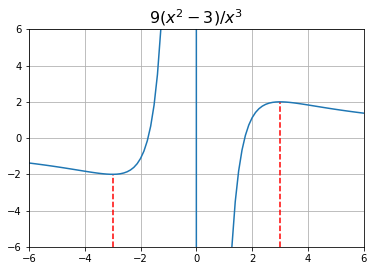

In [35]:
x_=np.linspace(-6,6 , 100)
y_=9*(x_**2-3)/x_**3
plt.title("$9(x^2-3)/x^3$",size=16)
plt.plot([3,3],[-6,2],'r--')
plt.plot([-3,-3],[-6,-2],'r--')
plt.plot(x_,y_)
plt.ylim([-6,6])
plt.xlim([-6,6])
plt.grid();

Note
---
Actually, 2 is not maximum of $f(x)$, but relative maximum, here; and $-2$ is not minimum of $f(x)$, but relative minimum.(?)

Example
---
Extrema of $2x-3x^{2/3}$ on $[-1,3]$.

In [62]:
# Example
f=2*x-3*(x)**(2/3)
cri=Criticals(f,x,rational=True)

Critical Points of f(x)=-3*x**0.666666666666667 + 2*x: [1.00000000000000] 


Note
---
Actually, one critical point, $x=0$, is missed.


$$f'(x)=2-2x^{-1/3}=\frac{2(x^{1/3}-1)}{x^{1/3}}$$
1. $f'=0\Rightarrow x=1$;
2. $f'(x)$ fails to exist at $x=0$.

Critical points are $\{0,1\}$.

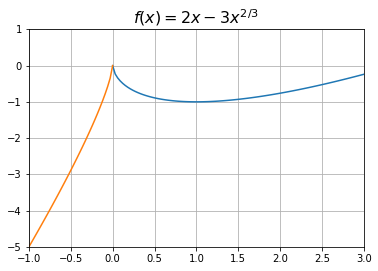

In [107]:
t_=np.linspace(0,3,101)
x1_=t_
y1_=2*t_-3*(t_)**(2/3)
plt.plot(x1_,y1_)
x2_=-t_
y2_=-2*t_-3*(t_)**(2/3)
plt.plot(x2_,y2_)
plt.title("$f(x)=2x-3x^{2/3}$",size=16)
plt.grid()
plt.xlim([-1,3])
plt.ylim([-5,1]);

In [63]:
f=2*x-3*(abs(x))**(2/3)
extrema_BI(f,x,[-1,0,1,3])

In [21]:
# Example, 3x^4-4x^3 on [-1,2]
f=3*x**4-4*x**3
cri=Criticals(f,x,BC=[-1,2])

Critical Points of f(x)=3*x**4 - 4*x**3: [-1, 0, 1, 2] 


In [22]:
#cri=[-1,0,1,2]
extrema_BI(f,x,cri)

In [39]:
# Example, 3x^4-4x^3 on [-1,2]
f=3*x**4-4*x**3
diff_app(f,x)

<IPython.core.display.Latex object>

In [40]:
extrema_BI(f,x,cri)

<IPython.core.display.Latex object>

Example
---
$f(x)=2\sin x-\cos2x$ on $ [0,2\pi]$.

In [41]:
# 2sin(x)-cos(2x)
f=2*sin(x)-cos(2*x)
Criticals(f,x)

Critical Points of f(x)=2*sin(x) - cos(2*x): [-5*pi/6, -pi/2, -pi/6, pi/2] 


[-5*pi/6, -pi/2, -pi/6, pi/2]

In [42]:
Criticals=[0,pi/2,7*pi/6,3*pi/2,11*pi/6,2*pi]
extrema_BI(f,x,Criticals)

<IPython.core.display.Latex object>

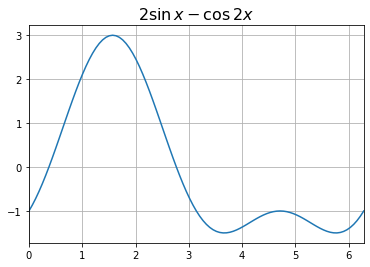

In [119]:
t_=np.linspace(0,2*np.pi,101)
x_=t_
y_=2*np.sin(t_)-np.cos(2*t_)
plt.plot(x_,y_)
plt.title("$2\sin x-\cos2x$",size=16)
plt.grid()
plt.xlim(0,2*np.pi);

Before evaluating the properties, convert $f(x)$ as follows:
$$ \large{\cos2x=1-2\sin^2x\Rightarrow f(x)=2\sin x-\cos2x=2\sin x-\left(1-2\sin^2x\right)}$$

In [134]:
f=2*sin(x)-(1-2*sin(x)**2)
diff_app(f,x)

<IPython.core.display.Latex object>

3.1 Exercise
---

In [ ]:
# 13. 4x/(1+x^2) 

In [120]:
f=4*x/(1+x*x)
simplify(f)

4*x/(x**2 + 1)

In [51]:
# f'
simplify(cancel(diff(f,x,2)))

8*x*(x**2 - 3)/(x**6 + 3*x**4 + 3*x**2 + 1)

In [122]:
Criticals(f,x,rational=True)

Critical Points of f(x)=4*x/(x**2 + 1): [-1, 1] 


[-1, 1]

In [135]:
f=4*x/(1+x*x)
diff_app(f,x,rational=True)

<IPython.core.display.Latex object>

In [136]:
#14 sin(x)^2+cos x, critical point on [0,2pi], pi/3,5pi/3
f=sin(x)*sin(x)+cos(x)
diff_app(f,x)

<IPython.core.display.Latex object>

In [72]:
#22 3x^(2/3)-2x on [-1,1]

f=3*(x**2)**(1/3)-2*x
diff(f,x)

2.0*Abs(x)**(-0.333333333333333)*sign(x) - 2

In [73]:
Criticals=[-1,0,1]
extrema_BI(f,Criticals)

Extrema of - 2 x + 3 \left|{x}\right|^{0.666666666666667}
---
at x=-1, f(x)=5
at x=0, f(x)=0
at x=1, f(x)=1
---
Maximum is 5, and Minimum is 0


In [76]:
#27 f=ln x/x on [1,4]
solve(diff(log(x)/x,x),x)

[E]

In [80]:
f=log(x)/x
Criticals=[1,exp(1),4]
extrema_BI(f,Criticals)

Extrema of \frac{\log{\left(x \right)}}{x}
---
at x=1, f(x)=0
at x=E, f(x)=exp(-1)
at x=4, f(x)=log(4)/4
---
Maximum is exp(-1), and Minimum is 0


In [81]:
#28 5e^x-e^(2x), [-1,2]
f=5*exp(x)-exp(2*x)
solve(diff(f,x),x)

[log(5/2)]

In [82]:

Criticals=[-1,log(5/2),2]
extrema_BI(f,Criticals)

Extrema of - e^{2 x} + 5 e^{x}
---
at x=-1, f(x)=-exp(-2) + 5*exp(-1)
at x=0.916290731874155, f(x)=6.25000000000000
at x=2, f(x)=-exp(4) + 5*exp(2)
---
Maximum is 6.25000000000000, and Minimum is -exp(4) + 5*exp(2)


3.2 Rolle's Theorem and the Mean Value Theorem
===
Theorem (Rolle's Theorem)
---
  Assume that $f (x)$ is continuous on $[a, b]$ and differentiable in $(a,
  b)$. If $f (a) = f (b)$, there exists at least $c \in (a, b)$ such that $f'
  (c) = 0$.
<img src="imgs/2/cal3-38.png" width=80% />  
Proof:
---  
1.  If $f (x)$ is constant on $[a, b]$, then done.
2. Suppose that $f (x) > f (a) = C$ for some $x \in (a, b)$. By the
    Extrema Value Theorem, $f (x)$ has a maximum for some $c \in (x, b)$.
    Since $f (x) $ is differentiable in this interval, $f' (c) = 0$.
3. Case about  $f (x) < f (a) = C$ could be proved similarly.




Example
---
Between $X-$intercetions, $f(x)=x^2-3x+2$ has a critical point.

1. $X-$interceptions: 
$$f(x)=0\Rightarrow x^2-3x+2\Rightarrow x=1,2$$
2. $f(1)=f(2)=0$, $f$ is continunus on $[1,2]$, and differentiable in $(1,2)$.
3. $f'(c)=0\Rightarrow 2x-3=0\Rightarrow x=3/2$, 

In [14]:
x_=np.linspace(1,2,101)
f_=x_**2-3*x_+2

ex.line(x=x_,y=f_)

Example
---
Consider the function,  $f (x) = x^4 - 2 x^2 $ for $x \in I=[- 2, 2]$. 

1. $f(x)$ is continuous on $I$ and differentiable in $I$.
2. $f(2)=f(-2)=8$.
3. 
$$0=f'(x)\Rightarrow 4x^3-4x=0\Rightarrow x=0,\pm1$$




In [12]:
x_=np.linspace(-2,2,101)
f_=4*x_**4-2*x_**2

ex.line(x=x_,y=f_)

Example
---
Suppose that $f (x) = x - x^{1 / 3} $ for $x \in [- 1, 1] = [- 1, 0] \cup
  [0, 1]$. 
  
Since $f (- 1) = f (0) = f (1) = 0$, we can find $c = \frac{\pm
  1}{\sqrt{27}}$ such that $f' (c) = 0$.



In [146]:

t_=np.linspace(-1,1,101)
x_=t_**3
y_=t_**3-t_
with plt.xkcd():
    plt.figure(figsize=(8,6))
    plt.plot(x_,y_)
    plt.plot([1/np.sqrt(27),1/np.sqrt(27)],[-0.5,0.5],'r--')
    plt.plot([-1/np.sqrt(27),-1/np.sqrt(27)],[-0.5,0.5],'g--')
    plt.text(.25,-0.45,r'$x=1/\sqrt{27}$',color="red")
    plt.text(-.5,0.4,r'$x=1/\sqrt{27}$',color="green")

    plt.ylim([-0.5,0.5])


Example 
---
Suppose that $f(x)=x^3+x+1$. 
- By **Internediate Value Theorem**, $f(-1)=-1<0$ and $f(1)=3>0$, $f(x)$ has at least a zero root. 
- Does $f(x)$ have zero roots more than one?

Suppose that its zero root more than two, and $c$ and $d$ with $c<d$, are its distinct zero roots. 
Then 
- $f(c)=f(d)=0$;
- $f(x)$ is continuous on $[c,d]$ and differentiable in $(c,d)$ since it is a polynomial.

By Rolle's theorem, there is a $x_0\in(c,d)$ such that $f'(x_0)=0$. But it is contradict to the fact 
$$f'(x)=3x^2+1>0.$$


Theorem (Mean Value Theorem, MVT)
---
Assume that $f (x)$
  is continuous on $[a, b]$ and differentiable in $(a, b)$. There exists at
  least one $c \in (a, b)$ such that
$$ f' (c) = \frac{f (b) - f (a)}{b - a} $$
  
**Proof:** Consider the graph,
  
<img src="imgs/2/ch4-38.png" />

  We also the following:
$$ l (x) = f (x) - \left( f (a) + \frac{f (b) - f (a)}{b - a} (x - a)
     \right) 
$$     
 Then $l (x)$ satisfies all the conditions in (Rolle's  Theorem):
1.  $l (x)$ is continuous on $[a,b]$, and differentiable in $(a,b)$;
2. $l(a)= f (a) - \left( f (a) + \frac{f (b) - f (a)}{b - a} (a - a)\right)=0$, and $f(b)=0$.

Thus there exists at least $c\in(a,b)$ such that:
$$ 0=l'(c)=\left. f'(x) - \left( f (a) + \frac{f (b) - f (a)}{b - a} (x - a)\right)' \right|_{x=c}=f'(c)-\frac{f (b) - f (a)}{b - a}$$ 
This  proved the theorem.

Example
---
Consider the function,  $f (x) = 5 - 4/x $ for $x \in I=[1, 4]$. 

1. $f(x)$ is continuous on $I$ and differentiable in $I$.
2. $1=f(1)\ne f(4)=4$.
3. $f'x)=4/x^2$:
$$f'(c)=\frac{f(4)-f(1)}{4-1}=1=\frac{4}{c^2}\Rightarrow c=2$$




In [27]:
x_=np.linspace(1,4,101)
f_=5-4/x_

l=ex.line(x=x_,y=f_)
l.add_scatter(x=[1,4],y=[1,4],name='(f(4)-f(1))/(4-1)')
l.add_scatter(x=[1,2,3],y=[2,3,4],name='slope=$f\'(2)$')

Example
---
  Suppose that there are two stationary patrol cars equipped with radar are
  10,000 meters apart.  As a truck passes the first patrol car, its speed is
  clocked at 80,000 meter/hour. Five minutes later, its speed is clocked by the
  other patrol car at 85,000 meter/hour. does this truck exceed the speed
  limit 100,000 meter/hour?
  
  **Sol:**
  Let $f (t)$ be the velocity of truck where $t$ is in hour. Truck spent $ 5 / 60 = 1 / 12$ hr
  passed the interval between patrol card located.
  . By the MVT, we have
  \begin{eqnarray*}
    f' (c) & = & \frac{10, 000 \text{ meter}}{1 / 12 \text{ hour}}\\
    & = & 120, 000 \text{ meter} / \text{ hour}
  \end{eqnarray*}
it must exceed the speed limit during this time period.

3.2 Exercise, p.165
6,9,26,32

Example
---

**6** Find the value, $c$, in Rolle's Theorem for $f(t)=t^{2/3}(6-t)^{1/3}$ for $t\in[0,6]$.

\begin{eqnarray}
0=f'(t)&=&\frac{2}{3}t^{-1/3}(6-t)^{1/3}+\frac{1}{3}t^{2/3}(6-t)^{-2/3}\\
       &=&\frac{2(6-t)+t}{3t^{1/3}(6-t)^{2/3}} \\
     \Longrightarrow&& 12-3t=0\to t=4  
\end{eqnarray}

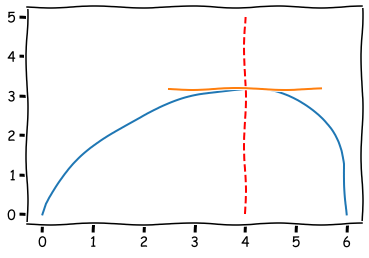

In [87]:
t=np.linspace(0,6,101)

y=t**(2/3)*(6-t)**(1/3)
with plt.xkcd():
    plt.plot(t,y)
    plt.plot([4,4],[0,5],'r--')
    plt.plot([2.5,5.5],(2**(5/3),2**(5/3)))

**13** Find the value, $c$, in Mean Value Theorem for $f(x)=x\sqrt{2x+1}$ for $x\in[0,4]$.

**Sol**
1. $f(0)=0,f(4)=12$;
- 

\begin{eqnarray}
f'(c)&=&\frac{f(4)-f(0)}{4-0}=3\\
       &=&\left.(x\sqrt{2x+1})'\right|_{x=c} \\
       &=&\frac{2c+1+c}{\sqrt{2c+1}}\\
     \Longrightarrow&& 3^2(2c+1)=(3c+1)^2\to c=\frac{2+2\sqrt3}{3} 
\end{eqnarray}

In [89]:
c=symbols("c")
sol=solve(9*(2*c+1)-(3*c+1)**2,c)
pprint(sol)



⎡2   2⋅√3  2   2⋅√3⎤
⎢─ - ────, ─ + ────⎥
⎣3    3    3    3  ⎦


In [90]:
c_=(2+2*np.sqrt(3))/3
fc=c_*np.sqrt(2*c_+1)

# y=3x-3c+f(c)
t_=np.linspace(1,3,101)

x_=np.linspace(0,4,101)
y_=x_*np.sqrt(2*x_+1)
with plt.xkcd(False):
    plt.plot(x_,y_)
    plt.plot([0,4],[0,12],'brown')
    plt.plot([-1/np.sqrt(27),-1/np.sqrt(27)],[-0.5,0.5],'g--')
    plt.plot(t_,3*t_-3*c_+fc)
    #plt.text(.25,-0.45,r'$x=1/\sqrt{27}$',color="red")
    #plt.text(-.5,0.4,r'$x=1/\sqrt{27}$',color="green")
    #plt.axis("equal")
    plt.xlim(0,4)

**16** Find the value, $c$, in Mean Value Theorem for $f(x)=\frac{\sin t}{1+\cos t}$ for $x\in[0,\pi/2]$.

**Sol**

1. $f(0)=0,f(\pi/2)=1$;


\begin{eqnarray}
f'(c)&=&\frac{f(\pi/2)-f(0)}{\pi/2-0}=\frac{2}{\pi}\\
       &=&\left.\left(\frac{\sin t}{1+\cos t}\right)'\right|_{x=c} \\
       &=&\frac{1}{1+\cos c}\\
     \Longrightarrow&& 1+\cos c= \pi/2\to c=\text{Cos}^{-1}(\pi/2-1)
\end{eqnarray}

In [96]:
t=symbols("t")

sol=solve(diff(sin(t)/(1+cos(t)),t),t)
pprint(sol)

[]


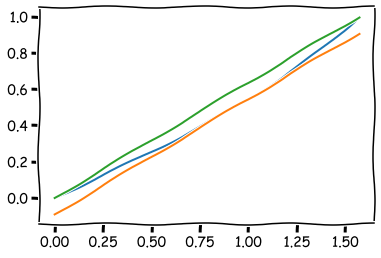

In [105]:
t_=np.linspace(0,np.pi/2,101)

y_=np.sin(t_)/(1+np.cos(t_))
with plt.xkcd():
    plt.plot(t_,y_)
    m=2/np.pi
    c0=np.arccos(np.pi/2-1)
    y0=np.sin(c0)/(1+np.cos(c0))
    ym=y0+m*(t_-c0)
    plt.plot(t_,ym)
    
    m1=(1-0)/(np.pi/2-0)
    y2=m1*(t_-0)
    plt.plot(t_,y2)
    #plt.plot([4,4],[0,5],'r--')
    #plt.plot([2.5,5.5],(2**(5/3),2**(5/3)))

**23.** If

$$f(x)=\cases{x^2& if $0\le x<1$\\2-x& if $1\le x\le2$}$$
does $f(x)$ satisfy MVT?
- Since $\lim\limits_{x\to1^+}f(x)=1=\lim\limits_{x\to1^-}f(x)$, $f(x)$ is continuous at $x=1$ and continuous on $[0,2]$.
- but $f'(1)$ fails to exist since $\lim\limits_{x\to1^-}f'(x)=2\ne\lim\limits_{x\to1^+}f'(x)=-1$.

- if $c$ exists, $f(2)=0,f(0)=0$, then

$$f'(c)=\frac{f(2)-f(0)}{2-0}=0$$

But $f'(x)\ne0$ for any $x\in(0,2)$.

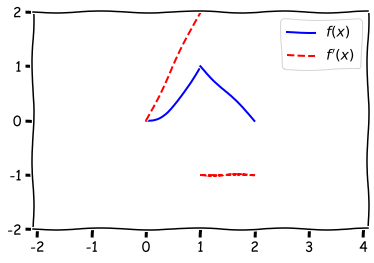

In [107]:
x1=np.linspace(0,1,101)
x2=np.linspace(1,2,101)
plt.plot(x1,x1**2,'b-',label="$f(x)$")
plt.plot(x2,2-x2,'b-')
plt.plot(x1,2*x1,'r--',label="$f'(x)$")
plt.plot(x2,-np.ones(len(x2)),'r--')

plt.grid()
plt.axis("equal")
plt.ylim(-2,2)
plt.legend();

**24.**
$f(x)=4x^3-4x+1$ has one zero root in $(0,1)$. 
- Why couldn't we  prove it by intermediate value theorem?
- Consider $g(x)=x^4-2x^2+x$. Note that $g'(x)=f(x)$ and $g(0)=g(1)=0$. By Rolle's theorem, There exists a $c$ such that 
$$ g'(c)=0$$
i.e. $f(c)=0$.


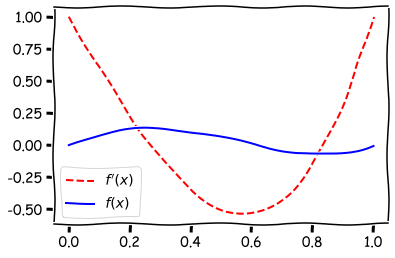

In [108]:
x_=np.linspace(0,1,101)

plt.plot(x_,4*x_**3-4*x_+1,'r--',label="$f'(x)$")

plt.plot(x_,x_**4-2*x_**2+x_,'b',label="$f(x)$")

#plt.ylim(-2,2)
plt.grid()
plt.legend()

**26.**
$f(x)=x^7+6x^5+2x-6$ has exact one zero root. 

- $f(0)=-6<0, f(1)=3>0$, there exists at least one zero root by intermediate value theorem;
- suppose there are two distinct zero roots, $c,d$, $f(c)=f(d)=0$. Then by MVT, there is a $x_0$ within $c$ and $d$, such that:

$$ f'(x_0)=\frac{f(c)-f(d)}{c-d}=0$$

But $f'(x)=7x^6+30x^4+2>0$. $f(x)$ has only one zero root.

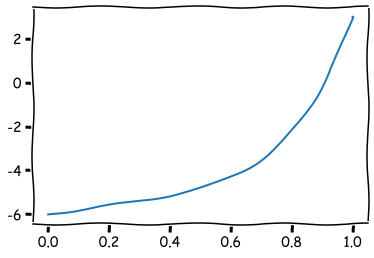

In [109]:
x_=np.linspace(0,1,1001)
plt.plot(x_,x_**7+6*x_**5+2*x_-6)

plt.grid()


**28.**
By MVT,

\begin{eqnarray}
 \left|\frac{\sin a-\sin b}{a-b}\right|&=& \left|\cos x_0\right|\le1\\
 \Longrightarrow&&\left|\sin a-\sin b\right|\le \left|a-b\right|
\end{eqnarray}

**32.** If

$$f(x)=\cases{x\sin\frac{\pi}{x}& if $x>0$\\0&if $x\le0$}$$
does $f(x)$ satisfy MVT?
- $f(0)=0$, since $\lim\limits_{x\to0^+}f(x)=0$, $f(1)=0$; 
- and the derivateive is 

$$\mathbf{ 0=f'(x)=\sin\frac{\pi}{x}-\frac{\pi}{x}\cos\frac{\pi}{x}}$$

Note that $\sin\pi/x=0$, $\pi/x>0$ for $x=1,1/2,1/3,\cdots$ and the sign for $\cos\pi/x$ changes alternatively;

- Then

\begin{eqnarray}
\mathbf{1/x}&:& 1,&2,&3,&4,&5,&\cdots\\
\mathbf{x}&:&1,&\frac{1}{2},&\frac{1}{3},&\frac{1}{4},&\frac{1}{5},&\cdots\\
\mathbf{f'(x)}&:&+,&-,&+,&-,&+,&\cdots 
\end{eqnarray}

This means there exists at least one zero root within $\mathbf{(1/(n+1),1/n)}$, for $n=1,2,3\cdots$. Therefore, $f'(x)$ has infinite zero roots within $(0,1)$.


To observe what happens about $x$ around origin, we use **plotly.express**, enhanced by *Javascript* library, to recreate the picture which avails more flexible interactive functions for output observation:

In [115]:
import plotly.express as ex

In [117]:
x_=np.linspace(0+1e-5,1,4001)
ex.line(x=x_,y=x_*np.sin(np.pi/x_))



**48.**
Suppose that $|f'(x)|<1$. Then
by MVT, we have

\begin{eqnarray}
 \left|\frac{f(x_1)-f(x_2)}{x_1-x_2}\right|&=& \left|f'(c)\right|\le1\\
 \Longrightarrow&&\left|f(x_1)-f(x_2)\right|\le \left|x_1-x_2\right|
\end{eqnarray}
Such kind of function is called *Lipstch* continuous.

3.2 Exercises, 
---
p.164, 6,9,26,32

In [140]:
#6, f'(c)=0 where f=x(x+4)^(1/2)
f=x*sqrt(x+4)
der=diff(f,x)
Latex(latex(der))
sol=solve(diff(f,x),x)
#print("f'(x)={}, c={} where f'(c)=0".format(latex(der),sol[0]))
Latex("Function: ${}$, $\Rightarrow$ $f'(x)={}$ and $c={}$ where $f'(c)=0$ ".\
      format(latex(f),latex(der),latex(sol[0])))

<IPython.core.display.Latex object>

In [141]:
#9 f=x^(2/3)-1
diff(x**(2/3),x)

0.666666666666667*x**(-0.333333333333333)

Rolle's Theorem fails here since $f'x)\ne0$, i.e. $f'(x)$ fails to exist in any interval containing $x=0$.

In [163]:
#32 f=xlog2(2) on [1,2]
f=x*log(x)/log(2)
der=diff(f,x)
m=(2*np.log2(2))
Latex(latex(der))
sol=solve(diff(f,x)-m,x)
#print("f'(x)={}, c={} where f'(c)=0".format(latex(der),sol[0]))
MVT="f'c)=\\frac{f(b)-f(a)}{b-a}"
Latex("Function: ${}$, $\Rightarrow$ $f'(x)={}$ and $c={}$ where $${}$$".\
      format(latex(f),latex(der),latex(sol[0]),MVT))

<IPython.core.display.Latex object>

3.3 Monotonicity, Increasing and Decreasing
---

Definition
---
Suppose that $f (x)$ is continuous on $[a, b]$.
1. $f (x)$ is called increasing if $f (x_1) < f (x_2)$ for any $x_1,
    x_2 \in [a, b]$.
- $f (x)$ is called decreasing if $f (x_1) > f (x_2)$ for any $x_1,
    x_2 \in [a, b]$.



From now on, an increasing function, $f (x)$, is also denoted by
$\color{brown}{f \nearrow}$ and decreasing denoted by $\color{brown}{f
\searrow}$.


Theorem
---
  If $f' (x) \ge 0$ for all $x \in (a, b)$ with $f' (x) = 0$ only at
  isolated points, then $f (x)$ is increasing on $[a, b]$. And if $f' (x)
  \le 0$ for all $x \in (a, b)$, then $f (x)$ is decreasing.
  
**Proof**.

Suppose that $f'(c)>0$ for $c\in(a,b)$. Then :
$$f'(c)=\lim_{h\to0}\frac{f(c+h)-f(c)}{h}>0$$
i.e. there exists a $h$ such that
1. If $h>0$, for any $x\in(c,c+h)$:
$$ \frac{f(x)-f(c)}{x-c}>0\Rightarrow f(x)-f(c)>0\Rightarrow f(x)>f(c)$$
since $x-c>0$;
2. If $h<0$, for any $x\in(c+h,c)$:
$$ \frac{f(x)-f(c)}{x-c}>0\Rightarrow f(x)-f(c)<0\Rightarrow f(x)<f(c)$$
since $x-c<0$;
These conclude that $f(x)$ is increasing for $x\in(c-h,c+h)$.

The points at which $f' (x) = 0$ is very important in mathematical analysis:

Definition
---
  The points of $x$ at which $f' (x) = 0$ or nonexistence are called critical
  points of $f (x)$.



In [45]:
f=x**3-3*x**2/2
diff_app(f,x)

<IPython.core.display.Latex object>

Example
---
a) $(x^2-4)^{2/3}$ <br>
b) $\frac{x^4-1}{x^2}=x^2-x^{-2}$

In [47]:
f=(x**2-4)**(2/3)
diff(f,x)

1.33333333333333*x*(x**2 - 4)**(-0.333333333333333)

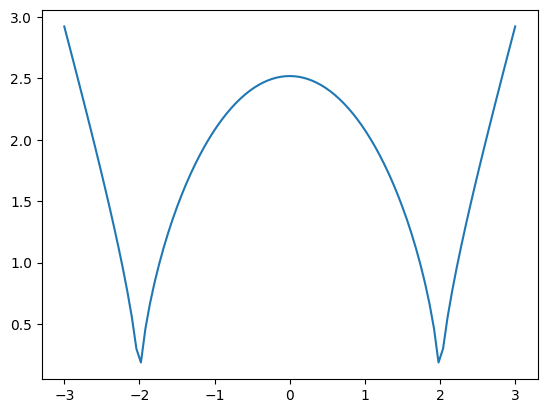

In [57]:
import numpy as np
import matplotlib.pyplot  as plt
t_=np.linspace(-3,3,101)
x_=t_
y_=np.abs((t_**2-4))**(2/3)
plt.plot(t_,y_)
plt.show()

1. Critical points: $0,\pm2$, i.e. $x^2-4=0$
2. $f$ is increasing for $-2<x<0,x>2$
3. $f$ is decreasing for $-2>x,0<x<2$

Note
---
At Critical points, we have
$$ x\cdot (x^2-4)=0$$

In [50]:
f=x**2+1/x**2
diff(f,x)

2*x - 2/x**3

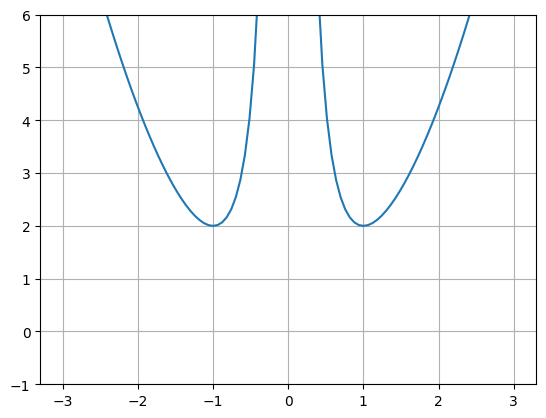

In [62]:
t_=np.linspace(-3,3,100)
x_=t_
y_=t_**2+1/t_**2
plt.plot(x_,y_)
plt.grid()
plt.ylim(-1,6)
plt.show()

1. At Critical points:
$$(x^4-1)\cdot x^2=0\Rightarrow x(x^2-1)=0\Rightarrow0,\pm1$$
2. $f$ is increasing for $-1<x<0,x>1$
3. $f$ is decreasing for $-1>x,0<x<1$

Example
---
  Determine the intervals at which the following functions are increasing or
  decreasing:

a). $x (20 - x)$<br>
b). $2 x^3 + 3 x^2 - 12 x + 1$<br>
c). $x^{- 2 / 3}$

Sol:
---  
**a)** Since $f' (x) = 20 - 2 x$, there is only one critical point at $x =
    10$. Therefore $f' (x) > 0$ for $x < 10$,
    
<img src="imgs/2/ch4-1.png" />
this implies $f (x)$ is increasing and $f (x)$ is decreasing if $x > 10$.
    
**b).** $f' (x) = 6 x^2 + 6 x - 12 = 6 (x + 2) (x - 1) = 0$ implies $x = -
    2$ or $1$. And
    
<img src="imgs/2/ch4-2.png" />
    
This implies $f (x)$ is increasing for $x < - 2$ or $x > 1$ and $f (x)$ is decreasing if $- 2 < x < 1$.
    
**c).** Since $f' (x) = - 2 x^{- 5 / 3} / 3 > 0$ for $x < 0$, $f (x)$ is
    increasing for $x < 0$ and decreasing for $x > 0$.
<img src="imgs/2/ch4-3.png" />


In [147]:
f=(20-x)*x
diff_app(f,x)

<IPython.core.display.Latex object>

In [148]:
f=2*x**3+3*x**2-12*x+1
diff_app(f,x)

<IPython.core.display.Latex object>

Example
---
Determine the intervals at which $f(x)=x^3-3x^2+2$ is increasing or decreasing.

Since $f'(x)=3x(x-2)$,
- $x\le0$ or $x\ge2$ implies $f'(x)\ge0$: $f(x)$ is increasing;
- $0\le x\le2$ implies $f'(x)\le0$: $f(x)$ is decreasing.


In [149]:
f=x**3+3*x**2
diff_app(f,x)

<IPython.core.display.Latex object>

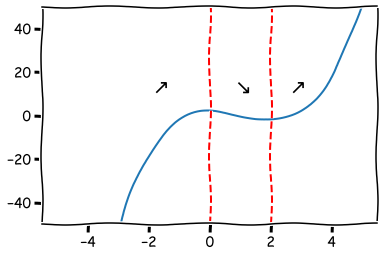

In [135]:
x_=np.linspace(-5,5,101)
f=x_**3-3*x_**2+2
with plt.xkcd():
   plt.plot(x_,f)
   plt.plot([0,0],[-50,50],'r--')
   plt.plot([2,2],[-50,50],'r--')
   plt.text(0.7,10, r'$\searrow$',size=20)
   plt.text(2.5,10, r'$\nearrow$',size=20)
   plt.text( -2,10, r'$\nearrow$',size=20)
   plt.ylim(-50,50)

Example
---

- $x^4-4x^3+12$ $f'(x)=0$ implies $x=0,3$

- $15x^{2/3}-3x^{5/3}$: critical points: $2,0$.

In [150]:
f=x**4-4*x**3+12
diff_app(f,x)

<IPython.core.display.Latex object>

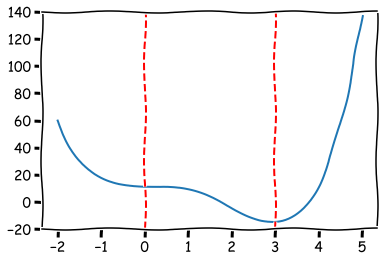

In [151]:
x_=np.linspace(-2,5,101)
f=x_**4-4*x_**3+12
with plt.xkcd():
  plt.plot(x_,f)
  plt.plot([0,0],[-20,140],'r--')
  plt.plot([3,3],[-20,140],'r--')
  plt.ylim(-20,140)

In [152]:
from fractions import Fraction

fA=15*x**Fraction(2,3)-3*x**Fraction(5,3)

diff(fA,x)


-5*x**(2/3) + 10/x**(1/3)

In [166]:
solve(diff(fA,x)>0)

(0 < x) & (x < 2)

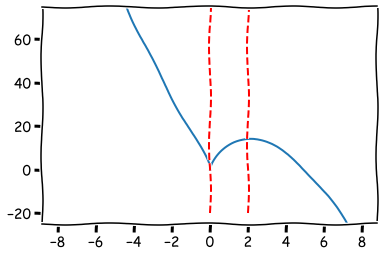

In [153]:
# 15x^(2/3)-3x^(5/3)
t_=np.linspace(-2,2,101)
x_=t_**3
f=15*t_**2-3*t_**5
with plt.xkcd():
  plt.plot(x_,f)
  plt.plot([0,0],[-20,140],'r--')
  plt.plot([2,2],[-20,140],'r--') 
  plt.ylim(-25,75)

Example
---
Find the critical points if any for the following functions:P
- $x-3x^{1/3}$: critical points: $1,0$.
- $3x^4-4x^3-8$, $f'(x)=0$ implies $x=0,3$



In [163]:
fA=x-3*x**(1/3)

print ("Critical Value: {}".format(solve(diff(fA,x),x)))

Critical Value: [1.00000000000000]


Also non-exitenc of $f'(x)$ implies $x=0$ is also a critical value.

In [182]:
solve(diff(fA,x)>0)

1 < x

In [164]:

fA=3*x**4-4*x**3-8
diff_app(fA,x)


<IPython.core.display.Latex object>

In [187]:
x_=np.linspace(-2,5,101)
f=3*x_**4-4*x_**3-8
with plt.xkcd():
  plt.plot(x_,f)
  #plt.plot([0,0],[-20,140],'r--')
  plt.plot([1,1],[-20,140],'r--')
  plt.ylim(-20,60)

In [16]:
def func(x):
    return 2*cos(x)-1

In [166]:
x=symbols("x",real=True)

In [168]:
from sympy import cos,pi
Criticals(2*cos(x)-x,x)

Critical Points of f(x)=-x + 2*cos(x): [-pi/6, 7*pi/6] 


[-pi/6, 7*pi/6]

In [169]:

Criticals(sin(2*x)+2*sin(x),x)

Critical Points of f(x)=2*sin(x) + sin(2*x): [-5*pi/3, -pi, -pi/3, pi/3, pi, 5*pi/3] 


[-5*pi/3, -pi, -pi/3, pi/3, pi, 5*pi/3]

**p.253**

#36

However, the critical value also includes $x=0$.

Note
---
Pthon could not recognize **correct** for $x^r$, for $x\le0$. To make the picture concern the odd root function can use parametric method:

$$ y= f(x)=15x^{2/3}-3x^{5/3}\Rightarrow (x,y)=(t^3,15t^2-3t^5)$$

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.express as ex

pyo.init_notebook_mode()

In [172]:


x_=np.linspace(0,4,101)
t_=np.linspace(-2**(1/3),0,101)
with plt.xkcd():
  plt.plot(x_,15*x_**(2/3)-3*x**(5/3))
  plt.plot(t_**3,15*t_**2-3*t**5,'b--')
  plt.plot([0,0],[0,35],'r--')
  plt.plot([2,2],[0,35],'r--')
  plt.ylim(0,35)

In [182]:
x_=np.linspace(-2**(1/3),4,101)
#t_=np.linspace(-2**(1/3),0,101)
yp=15*np.abs(x_)**(2/3)-3*np.abs(x_)**(5/3) *np.sign(x_)

ex.line(x=x_,y=[yp])


Exercise, p 273
---
Find out the intervals on which $f(x)$ is increasing or decreasing and find out relative extrema if any.

**24.** $f(x)=x/(x-1)$ <br>
**26.** $f(x)=x\sqrt{4-x}$ <br>
**30.** $f(x)=x/\sqrt{x^2-1}$<br>
**36.** $f(x)=\sin(x)/(1+\sin^2x)$, $x\in[0,2\pi)$<br>
**64** Show the following function is not monotonic in any interval , at which containing the origin:

$$f(x)=\cases{\frac{x}2+x^2\sin\frac{1}{x}&if $x\ne0$\\
              0& otherwise}$$

**68.** (Yes or No) If both $f(x),g(x)$ are increasing, then $f(x)g(x)$ is also increasing.<br>
**70.** (Yes or No) If  $f(x)$ is increasing on interval $I=[a,b]$, then $f'(x)\ge0$ for $x\in(a,b)$.<br>


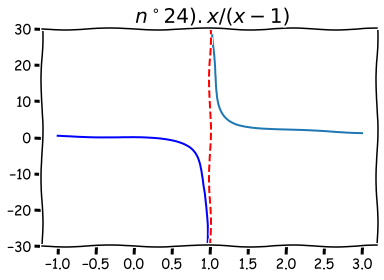

In [38]:
eps=1e-6
x=np.linspace(1+eps,3,101)
t=np.linspace(-1,1-eps,101)
with plt.xkcd():
  plt.title(r' $n^\circ 24). x/(x-1)$',size=20) 
  plt.plot(x,x/(x-1))
  plt.plot(t,t/(t-1),'b-')
  plt.plot([1,1],[-30,35],'r--')
  #plt.plot([2,2],[0,35],'r--')
  plt.ylim(-30,30)


In [183]:

t=symbols("t",positive=True)
solve(diff(t*sqrt(4-t),t),t)

[8/3]

In [22]:
solve(diff(t*sqrt(4-t),t)>0)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [151]:
x=np.linspace(-2,4,101)
with plt.xkcd():
  plt.title(r' $n^\circ 26). x\sqrt{4-x}$',size=20) 
  plt.plot(x,x*np.sqrt(4-x))
  plt.plot([8/3,8/3],[-30,35],'r--')
  #plt.plot([2,2],[0,35],'r--')
  plt.ylim(0,3.5)


In [51]:

solve(diff(t/sympy.sqrt(t**2-1),t),t)

[]

In [110]:
eps=1e-6
x=np.linspace(1+eps,2,101)
t=np.linspace(-2,-1-eps,101)
with plt.xkcd():
  plt.title(r' $n^\circ 30). x/\sqrt{x^2-1}$',size=20) 
  plt.plot(x,x/np.sqrt(x**2-1))
  plt.plot(t,t/np.sqrt(t**2-1),'b-')
  #plt.plot([1,1],[-30,35],'r--')
  #plt.plot([2,2],[0,35],'r--')
  plt.ylim(-5,5)


In [52]:
from sympy import sin,pprint
t=Symbol("t")
pprint(diff(sin(t)/(1+sin(t)**2),t))
pprint(solve(diff(sin(t)/(1+sin(t)**2),t),t))

                   2          
   cos(t)     2⋅sin (t)⋅cos(t)
─────────── - ────────────────
   2                        2 
sin (t) + 1    ⎛   2       ⎞  
               ⎝sin (t) + 1⎠  
⎡-π   π⎤
⎢───, ─⎥
⎣ 2   2⎦


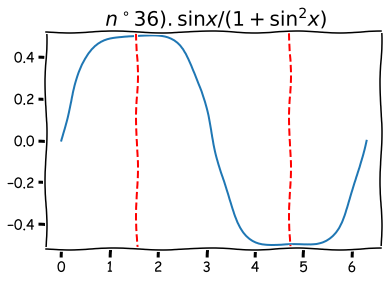

In [25]:
eps=1e-6
x=np.linspace(0,2*np.pi,101)

with plt.xkcd():
  plt.title(r' $n^\circ 36). \sin x/(1+\sin^2x)$',size=20) 
  plt.plot(x,np.sin(x)/(1+np.sin(x)**2))
  plt.plot([np.pi/2,np.pi/2],[-30,35],'r--')
  plt.plot([3*np.pi/2,3*np.pi/2],[-30,35],'r--')
  #plt.plot([2,2],[0,35],'r--')
  plt.ylim(-.52,.52)


In [31]:
import mjsplot.mjsplot as mplt

epsilon=1e-5
x=np.linspace(-.01+epsilon,.01,4001)
mplt.plot(x,x/2+x**2*np.sin(1/x))

mplt.xlabel('x')
mplt.ylabel('y')
mplt.title(' 64). x/2 + x**2 sin(1/x)')

mplt.useDefaults()

mplt.setStyle("color_fg","#222")
mplt.setStyle("line_thickness",1)
mplt.setStyle("graph_line_thickness",1) 
mplt.setStyle("scaling_factor",1.1)
mplt.setStyle("color_bg","white")
mplt.grid(True)
mplt.save('testgraph', width='100%', height='300px')


Text(0.5, 1.0, ' 64). $x/2 + x^2 \\sin(1/x)$')

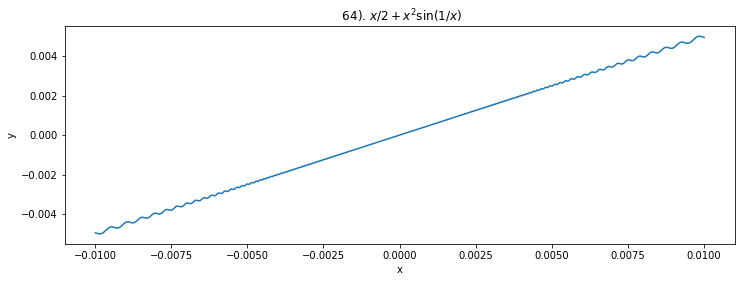

In [36]:
epsilon=1e-5
x=np.linspace(-.01+epsilon,.01,4001)
plt.figure(figsize=(12,4))
plt.plot(x,x/2+x**2*np.sin(1/x))

plt.xlabel('x')
plt.ylabel('y')
plt.title(' 64). $x/2 + x^2 \sin(1/x)$')



$$
f'(x)=\cases{1/2+ 2x\sin\frac{1}{x}-\cos\frac{1}{x}& if $x\ne0$\\
               1/2& if otherwise
             }  
$$

- For $x\to0^+$, take $x_n,x_{n+1}=\frac{1}{2n\pi},\frac{1}{2n\pi+\pi/2}$, where $n=1,2,3,\cdots$; $\{x_n\}\to0^+$.
  - $f'(x_n)=1/2-1<0$, $f'(x_{n+1})=1/2+\frac{2}{2n\pi+\pi/2}>0$, i.e.
    $f(x)$ is increasing around $x_n$ but decrasing $x_{n+1}$ whatever $n$ is. This implies $f(x)$ could not be monotonic within $[x_{n+1},x_n]$.
- Similar for $x<0$.  

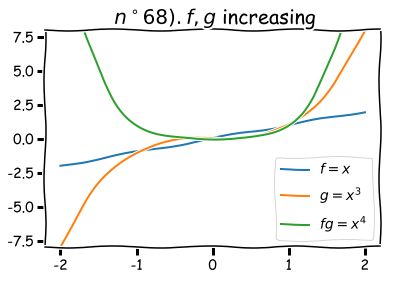

In [6]:

x=np.linspace(-2,2,101)

with plt.xkcd():
  plt.title(r' $n^\circ 68). f,g$ increasing',size=20) 
  plt.plot(x,x,label=r"$f=x$")
  plt.plot(x,x**3,label=r"$g=x^3$")  
  plt.plot(x,x**4,label=r"$fg=x^4$")
  plt.legend(loc="best")
  plt.ylim(-8,8)


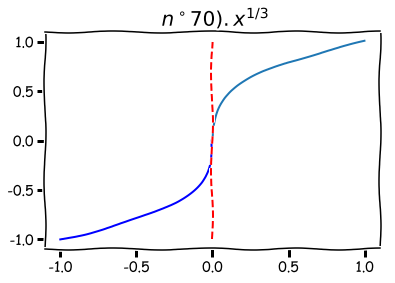

In [7]:
x=np.linspace(0,1,101)
t=np.linspace(-1,0,101)
with plt.xkcd():
  plt.title(r' $n^\circ 70). x^{1/3}$',size=20)
  plt.plot(x**3,x)
  plt.plot(t**3,t,'b-')
  plt.plot([0],[0],'r--')
  plt.plot([0,0],[-1,1],'r--')

3.4 Concavity and Inflation Points
===

**Definition**
---
  $f (x)$ is called concave upward if $f' (x)$ is increasing and $f (x)$ is
  called concave downward if $f' (x)$ is decreasing. And the point, at which the concavity changes, is called  
  inflation of curve.

**Theorem**
---
$f (x)$ is called concave upward if $f'' (x) > 0$ and $f (x)$ is called
 concave downward if $f'' (x) < 0$.
    
**Proof** Since $f'' (x) > 0$ implies $f' (x)$ is increasing. Therefore $f
(x)$ is concave upward.
    
<img src="imgs/2/ch4-25.png" />  

According the sign of $f' (x)$ and $f'' (x)$, the graphs of functions can be
one of four kinds:

<img src="imgs/2/ch4-26.png" /> 

Theorem
---
(**Second Derivatives Test**): Suppose that $f (x)$ is differentiable on an open
  interval, $I$ containing $x = c$ in which $f' (c) = 0$ and $f'' (x)$ exists
  for all the $x \in \overset{\circ}{I}$. Then

a). If $f'' (c) < 0$, then $f (x)$ is a relative maximum.
    
<img src="imgs/2/ch4-27.png" />     
b). If $f'' (c) > 0$, then $f (x)$ is a relative minimum.
    
<img src="imgs/2/ch4-28.png" /> 
    
c). If $f'' (c) = 0$, no conclusion.


Example
---
Suppose that $f (x) = x^4 - 4 x^3 + 12$. 
  
1. critical values
\begin{eqnarray*}
    0 & = & f' (x)\\
    & = & 4 x^3 - 12 x^2=4x^2(x-3)\\
    \Longrightarrow &  & x = 0 \text{ and } 3
\end{eqnarray*}
  there are two critical points, $x = 0, 3$:
2. Concavity,
\begin{eqnarray*}
    0 & = & f'' (x)\\
    & = & 12 x^2 - 24 x=12x(x-2)\\
    \Longrightarrow &  & x = 0 \text{ and } 2
\end{eqnarray*}

```

  f'(x)  |       -          |  +
 ------------ 0 ------2-----3--------
  f''(x) |  + |   -   |     +
```

This means $f(x)$ is concave upward for $x\in(-\infty,0]\cup[2,\infty)$ and downward otherwise.


Text(2.4, 30, "$f''(x)>0$")

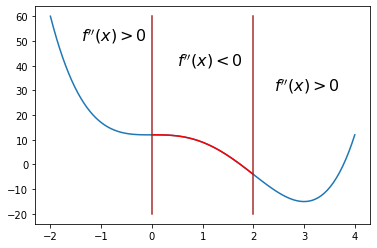

In [72]:
x_=np.linspace(-2,4,101)
t_=np.linspace(0,2,101)
plt.plot(x_,x_**4-4*x_**3+12)
plt.plot(t_,t_**4-4*t_**3+12,'r-')
plt.plot([0,0],[-20,60],color="brown")
plt.plot([2,2],[-20,60],color="brown")
plt.text(0.5,40,"$f''(x)<0$",size=16)
plt.text(-1.4,50,"$f''(x)>0$",size=16)
plt.text(2.4,30,"$f''(x)>0$",size=16)

Example
---
Suppose that $f (x) = x^4 - 8 x^2 + 2$. Then $f (x)$ attains it relative
  extrema as follows:
  
Since
\begin{eqnarray*}
    0 & = & f' (x)\\
    & = & 4 x^3 - 16 x\\
    \Longrightarrow &  & x = 0 \text{ and } \pm 2
\end{eqnarray*}
  there are three critical points, $x = 0, 2, - 2$:
- $f (0) = 2$ is relative maximum since $f' (0) = 0$ and $f'' (0) = -
    16 < 0$.
- $f (\pm 2) = - 14$ are relative minima since \ $f' (\pm 2) = 0$ and
    $f'' (\pm 2) = 32 > 0$

Example
---
Consider the Cost function, $C (x) = 500 + 20 x + 5 x^2$ for $x > 0$. Define
  the average cost funtion and marginal cost function as follows:
\begin{eqnarray*}
    \bar{C} & = & C (x) / x = 20 + 5 x + 500 / x\\
    \text{MC} & = & C' (x) = 20 + 10 x
  \end{eqnarray*}
Since

\begin{eqnarray*}
    \bar{C}' = 5 - 500 / x^2 = 0 & \Rightarrow & x = 10\\
    \text{MC}' (= 10) = 0 & \Rightarrow & \text{ No solution} !
  \end{eqnarray*}
  
$\bar{C}$ has only one critical value at $x = 10$ and $\bar{C}'' > 0$. Then
  ${\bar{C} (10)}$ is the relative minimum. It is also be the
  absolute minimum for  ${\bar{C} (x)}$ in $(0, \infty)$. But there is no extrema.since MC is always increasing (to $+\infty$).

Example
---
  Plot the graph of $f (x) = x \sqrt{1 - x^2}$ for $0\le x\le 1$ and
  discuss its extrema .
- First find all its critical point(s):

\begin{eqnarray*}
      0 = f' (x) & \Rightarrow & \sqrt{1 - x^2} - \frac{x^2}{\sqrt{1 - x^2}} =
      0\\
      & \Rightarrow & \frac{1 - x^2 - x^2}{\sqrt{1 - x^2}} = 0\\
      & \Rightarrow & x = \frac{1}{\sqrt{2}}
    \end{eqnarray*}
- Discuss its monotoncity and concavity:

\begin{eqnarray*}
      f'' (x) & = & \frac{- 3 x (1 - x^2) - x^3}{\sqrt{(1 - x^2)^3}}\\
      & = & \frac{x (2 x^2 - 3)}{\sqrt{(1 - x^2)^3}} < 0
\end{eqnarray*}
    
Then
    
<img src="imgs/2/ch4-31.png" />     
- connect the sub graphs at: $f (0) = f (1) = 0$ and $f (1 / \sqrt{2})
    = 1 / 2$, ref the following:
    

  It is obviously that $f (x)$ attains its maximum 1/2 at $x =
  \frac{1}{\sqrt{2}}$.
 


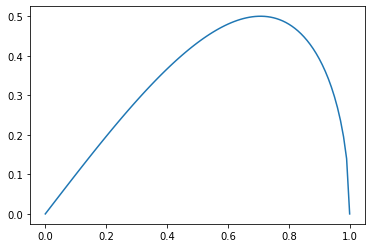

In [75]:
from IPython.display import Math

x_=np.linspace(0,1,101)
plt.plot(x_,x_*np.sqrt(1-x_**2))

#print("The derivative", Latex(Math('text{ is }x^2')))



Example
---
Plot the graph of $f (x) = x - \sin x$ for $x \in [0, \pi]$. And find all
  the zero root of $f (x)$.
  
Since $f (x)$ is odd, i.e. $f (- x) = - f (x)$, its graph is symmetry with
  repect to the original $(0.0)$. Therefore, only need to consider the part
  for $x > 0$.
- Since $| \cos x| \leqslant 1$, it is trivial that
$$ f' (x) = 1 - \cos x \geqslant 0 $$
This implies that $f (x)$ is always increasing.
    
- Concavity:
$$f'' (x) = \sin x \geqslant 0 $$
implies that it is always concave upward!

Then
  
<img src="imgs/2/ch4-33.png" />   
Also note $f (0) = 0 - \sin 0 = 0$ and increasing always $\Rightarrow$ there
  is no any $x > 0$ such that $f (x) = 0$!    

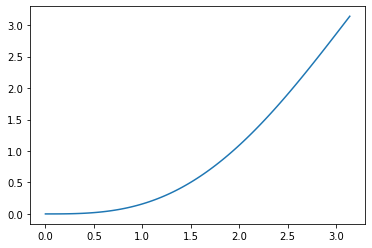

In [76]:

x_=np.linspace(0,np.pi,101)
plt.plot(x_,x_-np.sin(x_))

Example
---
plot the graphs of the following functions:
- $f (x) = x e^{- x}$, $x \in [0, \infty)$
- $g (x) = x^3 + x^2 - x + 3$

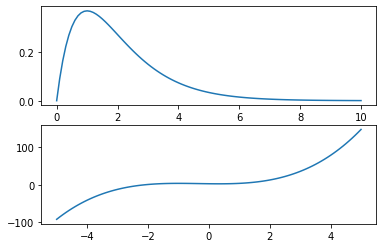

In [77]:
x_=np.linspace(0,10,101)
t_=np.linspace(-5,5,101)
f=x_*np.exp(-x_)
g=t_**3+t_**2-t_+3
plt.subplot(211)
plt.plot(x_,f)
plt.subplot(212)
plt.plot(t_,g)


Example
---
**18**. Decide the concavity of $f(x)=x-\sqrt{1-x^2}$

Since
$$f''(x)=\frac{-1}{(1-x^2)^{3/2}}<0$$
$f(x)$ is always concave downward for $|x|\le1$.

In [84]:
x= symbols("x",real=True)
f=x-sqrt(1-x**2)
pprint(diff(f,x,2))

    2      
   x       
 ────── + 1
      2    
 1 - x     
───────────
   ________
  ╱      2 
╲╱  1 - x  


**28**. Decide the concavity of $f(x)=x-\sin x$ for $x\in[0,4\pi]$.

Since
$$f''(x)=\sin(x)$$
$f(x)$ is concave downward for $x\in [\pi,2\pi]\cup[3\pi,4\pi]$ and concave upward for $x\in [0,\pi]\cup[2\pi,3\pi]$.

In [85]:
f=x-sin(x)
pprint(diff(f,x,2))

sin(x)




**32**. Decide the concavity of $f(x)=\frac{\sin x}{1+\sin x}$ for $x\in[-\pi/2,3\pi/2]$.

Since
$$f''(x)=-\frac{\sin^2x+\sin x+2\cos^2x}{(1+\sin x)^3}=-\frac{2+\sin x-\sin^2x}{(1+\sin x)^3}=-\frac{2-\sin x}{(1+\sin x)^2}\le0$$
$f(x)$ is always concave downward.






 ⎛              2    ⎞ 
 ⎜         2⋅cos (x) ⎟ 
-⎜sin(x) + ──────────⎟ 
 ⎝         sin(x) + 1⎠ 
───────────────────────
                 2     
     (sin(x) + 1)      


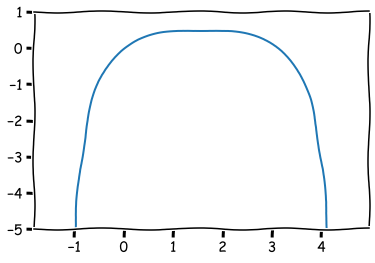

In [86]:
f=1-1/(1+sin(x))
pprint(diff(f,x,2))

with plt.xkcd():
     x_=np.linspace(-np.pi/2,3*np.pi/2,101)
     plt.plot(x_,np.sin(x_)/(1+np.sin(x_))) 
     plt.ylim(-5,1)


**36**. Find out inflation point of $f(x)=\cos\sin x$ for $x\in(-2,2)$.

Since
$$f''(x)=\sin x \sin\sin x -\cos^2x\cos\sin x$$
Not tritial to decide the concavity of $f(x)$.


In [81]:
from sympy import sin,cos
x=symbols("x")
f=cos(sin(x))
pprint(diff(f,x,2))


# Failed by SymPy
solve(diff(f,x,2),x)



                        2               
sin(x)⋅sin(sin(x)) - cos (x)⋅cos(sin(x))


NotImplementedError: multiple generators [_t, tan(_t/(_t**2 + 1))]
No algorithms are implemented to solve equation 4*_t*(_t**2 + 1)**2*(tan(_t/(_t**2 + 1))**2 + 1)*tan(_t/(_t**2 + 1)) - (1 - _t**2)**2*(1 - tan(_t/(_t**2 + 1))**2)*(_t**2 + 1)*(tan(_t/(_t**2 + 1))**2 + 1)

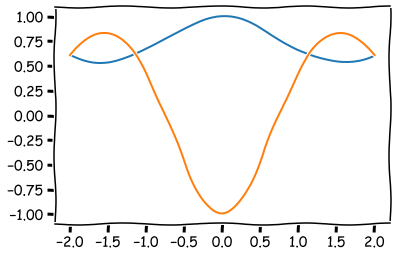

In [82]:
with plt.xkcd():
     
     x_=np.linspace(-2,2,101)
     plt.plot(x_,np.cos(np.sin(x_))) 
     plt.plot(x_,np.sin(x_)*np.sin(np.sin(x_))-np.cos(x_)**2*np.cos(np.sin(x_)))
     #plt.ylim(-5,1)

Relative Minima and Maxima
===
Definition
---
  Suppose that $f (x)$ is continuous on an interval, $I$. 
  - $f (c)$ is called a
  relative minimum if there exists a neighborhood $N \subseteq I$ at $x=c$ and
  $f (c) \leqslant f (x)$ for all $x \in N$. 
  - $f (d)$ is called a relative
  maximum if there exists a neighborhood $N \subseteq I$ of $x=d$ and $f (d)
  \geqslant f (x)$ for all $x \in N$. 
  
If $f (c) \leqslant f (x)$ for all $x
  \in I$, then $f (c)$ is called the **absolute minimum**. If $f (d) \geqslant f
  (x)$ for all $x \in I$, then $f (d)$ is called the **absolute maximum**.

Theorem
---
(**Existence of Extrema**) If $f (x)$ is continuous on a close interval, then it
  attains both its absolute maximum and its absolute minimum.



From the definition of extrema, absolute extrema are also the relative
extrema, but not necessary right conversely. The above theorem assures the the
existence of absolute extrema but finding the relative is more complex. 

Theorem
---
Suppose that $f (x)$ is continuous on an interval, $I$, and there is a
  relative extremum at $x = c$. Then
- $f' (c) = 0$, or
- $f' (c)$ fails to exist.

Such points are called **critical points** of $f (x)$ on the interval, $I$.


From tis theorem, only to check the values at critical points for relative
extrema since it is only possible for at which $f (x)$ occurs relative minimum
or maximum.

Example
---
Suppose that $f (x) = x - 3x^{1 / 3} $ for $x \in [- 2, 2] = [- 2, 0] \cup
  [0, 2]$. 

1. crititical points:
$$f'(x)=1-x^{-2/3}=0\text{ or fails to exist }\Longrightarrow\pm1\text{ or }1$$
- $f(\pm2)=\pm2\mp3\cdot2^{1/3}, f(-1)=2,f(1)=-2$ and $f(0)=0$ implies maximum is 2 and minimun is $-2$. 


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

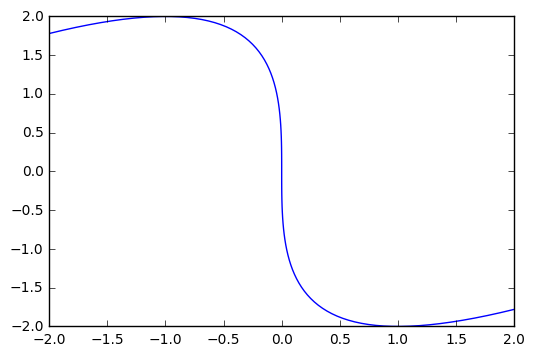

In [2]:
t=np.linspace(-2**(1/3),2**(1/3),101)
x=t**3
y=t**3-3*t
plt.plot(x,y)

Example
---
$f (2) = 8$ is the maximum and $f (1) = - 9$ is the minimum for $f (x) =
 3x^4- 4x^3 - 8$ in $[- 1, 2]$.
  
**Analysis**

- find out critical values:

\begin{eqnarray*}
      0 & = & f' (x)\\
      & = & (3x^4- 4x^3 - 8)'\\
      & = & 12x^3-12x^2\\
      & = & 12 x^2(x -1)\\
      \Longrightarrow &  & x = 0 \text{ or } 1
\end{eqnarray*}

- evaluate the function values at critical points, $x = - 1, 0, 1, 2$:

\begin{eqnarray*}
      f (- 1) & = & -1\\
      f (0) & = & -8\\
      f (1) & = & - 9\\
      f (2) & = & 8
\end{eqnarray*}

- $f (2) = 8$ is the **absolute maximum** and $f (1) = - 9$ is the
    **absolute minimum** of $f (x)$ on $[- 1, 2]$.

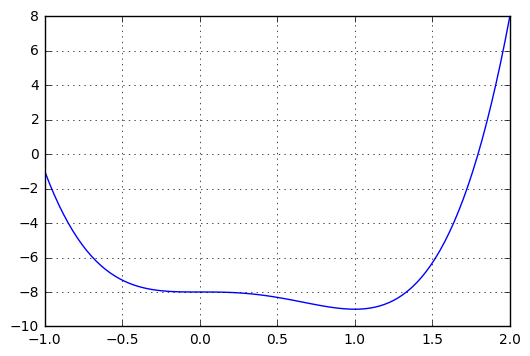

In [7]:
x=np.linspace(-1,2,101)
y=3*x**4-4*x**3-8
plt.plot(x,y)
plt.grid()

Example
---
Find all the extreme values of $f (x) = 2 \cos x-x$ for $x \in [0, 2\pi]$. 
  
- critical values:
$$ f' (x) =  - \sin x -1 = 0 \Longrightarrow \sin x=-\frac{1}{2}  \Longrightarrow x=\frac{7\pi}{6}, \frac{11\pi}{6}$$

- $f(0)=2,f(\frac{7\pi}{6})\sim -5.4, f(\frac{11\pi}{6})\sim -4.03,f(2\pi)=2-2\pi$ implies absolute maximum at $x=0$ and absolute minimum at $\frac{7\pi}{6}$


In [1]:
from numpy import cos,pi

In [2]:
x=7/6*pi
2*cos(x)-x

-5.3972422367569699

In [3]:
x=11/6*pi
2*cos(x)-x

-4.0275357240124103

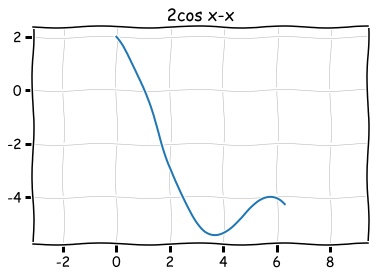

In [9]:
x=np.linspace(0,2*pi,101)
with plt.xkcd():
   plt.title(r"2cos x-x") 
   plt.plot(x,2*np.cos(x)-x)
   plt.xlim(0,2*pi)
   plt.axis("equal") 
   plt.grid(True, lw=0.5, zorder=0) 

Example
---
Find all the extreme values of $f (x) = 2 \sin x+\sin2x$ for $x \in [0, 3\pi/2]$. 
  
- critical values:
$$ f' (x) =  2\cos x +2\cos 2x = 0 \Longrightarrow  2\cos x +2\cos^2x-2=0  \Longrightarrow \cos x=-1,1/2, $$
i.e. $x=\pi/3,\pi$.
- $f(0)=0,f(\frac{\pi}{3})=3\sqrt3/2, f({\pi})=0,f(3\pi/2)=-2\pi$ implies absolute maximum at $x=\pi/3$ and absolute minimum at $\frac{3\pi}{2}$


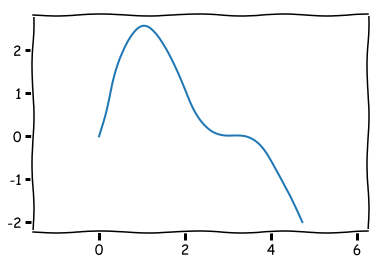

In [10]:
from numpy import sin
x=np.linspace(0,3*pi/2,101)
plt.plot(x,2*sin(x)+sin(2*x))
plt.xlim(0,3*pi/2)
plt.axis("equal")
plt.grid()

Exercise, p253
---
**38).** Find out all the critical values of $4t^{1/3}+3t^{4/3}$ and extremum if any. 

**1.** 

$$ 
  f'(t)=\left(4t^{\frac{1}{3}}+3t^{\frac{4}{3}}\right)'=\frac{4}{3}\left(t^{-\frac{2}{3}}+3t^{\frac{1}{3}}\right)
       =\frac{4(1+3t)}{3t^\frac{2}{3}}
$$

  **a).** If $f'(t)=0\Rightarrow1+3t=0\to t=-1/3$<br>
  **b).** If $f'(t)=0$ fails to exist, then the denominator is zero, $t^{2/3}=0\to t=0$<br>

**2.** Since 
  
  $$\lim\limits_{t\to\pm\infty} f(t) =+\infty,$$
  
  $f(t)$ can only attain its absolute minimum. The minimum is $f(-1/3)$, which is smaller than 0, since it is smaller than $f(0)=0$. 
   

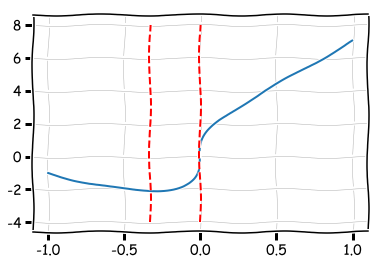

In [11]:
x=np.linspace(-1,1,101)
t= x**3
y= 4*x+3*x**4
with plt.xkcd():
     plt.plot(t,y)
     plt.plot((0,0),(-4,8),"r--") 
     plt.plot((-(1/3),-(1/3)),(-4,8),"r--")
     plt.grid(True, lw=0.5, zorder=0)   

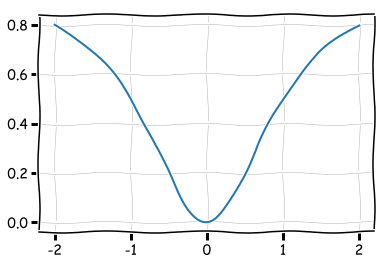

In [12]:
x=np.linspace(-2,2,101)

y= x**2/(1+x**2)
with plt.xkcd():
     plt.plot(x,y)
     plt.grid(True, lw=0.5, zorder=0)   
     #plt.plot((0,0),(-4,8),"r--") 
     #plt.plot((-(1/3),-(1/3)),(-4,8),"r--")

Exercise
---
**40).** Find out all the critical values of $\frac{x^2}{x^2+1}$.

$$ 
  f'(x)=\left(1-\frac{1}{1+x^2}\right)'=\frac{2x}{(1+x^2)^2}
$$
 If $f'(x)=0\Rightarrow x=0$.


**42).** Find out all the critical values of $2\sin{x}-\cos{2x}$.

\begin{eqnarray}
0= (2\sin{x}-\cos{2x})'&=& 2\cos x + (2\sin2x)\\ 
                    &=& 2(\cos x+2\sin\cos x)\\
                    &=& 2\cos x (2\sin x+1)\\
                   &\Downarrow&\\
                   &&  \cos x=0 \text{ or }\sin x=-1/2\\
             x &=& n\pi+\pi/2, n\pi+(-1)^{n+1}\pi/6, \text{ where } n\in\mathbf{Z}
\end{eqnarray} 

Exercise
---
**50).** Find out all the absolute extrema of $\frac{\sqrt u}{1+u^2}$ on $[0,2]$ if any. 

$$ 
  0=f'(t)=\left(\frac{\sqrt u}{1+u^2}\right)'=\frac{1+u^2-4u^2}{2\sqrt u(1+u^2)^2}
       \to u=\frac{1}{\sqrt3}
$$       
$f(1/\sqrt3)=\frac{(1/3)^{1/4}}{1+1/3}$ is absolute maximum and $f(0)=0$ is the absolute minimum. 

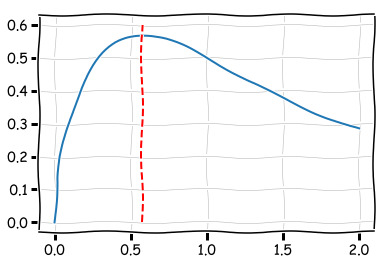

In [14]:
u=np.linspace(0,2,101)
from numpy import sqrt
with plt.xkcd():
    plt.plot(u,np.sqrt(u)/(1+u**2))
    plt.plot((1/np.sqrt(3),1/sqrt(3)),(0,0.6),'r--')
    plt.grid(True, lw=0.5, zorder=0)

In [15]:
from sympy import Symbol,solve,diff,sqrt,pprint
x=Symbol("x")
def critivalVal(x,func):
    sol=solve(diff(func,x),x)
    pprint(sol)
fA=sqrt(x)/(1+x**2)
criticalA=critivalVal(x,fA)


⎡-√3   √3⎤
⎢────, ──⎥
⎣ 3    3 ⎦


**56).**
  Find out extremum of $f (x) = x \sqrt{4 - x^2}$ for $ x\in[0,2]$ 
- First find all its critical point(s):

\begin{eqnarray*}
      0 = f' (x) & \Rightarrow & \frac{4-x^2-x^2}{{(4 - x^2)}^{1/2}} =
      0\\
      & \Rightarrow & x = \sqrt{2}
    \end{eqnarray*}


  It is obviously that $f (x)$ attains its maximum 2 at $x =
 \sqrt{2}$ and minimum 0 at $x=0,2$.
 

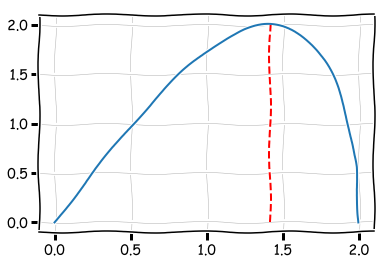

In [16]:
x=np.linspace(0,2,101)
with plt.xkcd():
    plt.plot(x,x*np.sqrt(4-x**2))
    plt.plot([np.sqrt(2),np.sqrt(2)],[0,2],'r--')
    plt.grid(True, lw=0.5, zorder=0)

Example
---
  Find the critical points of the following functions and determine whether
  the extrema occur at these points:

1. $f (x) = x^2 - 2 x$. Since
\begin{eqnarray*}
 & f' (x) = 0 & \\
 \Longrightarrow & 2 x - 2 = 0 & \\
 \Longrightarrow & x = 1 & 
\end{eqnarray*}
there is only one critical point, $x = 1$. And from the table
<img src="imgs/2/ch4-5.png" />
It is obvious that $f (x)$ attains its (absolute) minimum at the critical
    point, $x = 1$.
- $g (x) = x + \frac{1}{x}$, for $x \in (0, \infty)$. Since
\begin{eqnarray*}
 & g' (x) = 0 & \\
 \Longrightarrow & 1 - \frac{1}{x^2} = 0 & \\
 \Longrightarrow & x = 1 & 
\end{eqnarray*}
there is only one critical point, $x = 1$  and it is obvious that $g (x)$ attains its (absolute) minimum at the critical point, $x = 1$.
- $h (x) = x^{1 / 3}$. Since
\begin{eqnarray*}
 & h' (x) = 0 & \text{or fails to exist}\\
 \Longrightarrow & \frac{1}{3 x^{2 / 3}} = 0 & \text{or fails to exist}\\
 \Longrightarrow & x = 0 & 
\end{eqnarray*}    
there is only one critical point, $x = 0$. And from the table
<img src="imgs/2/ch4-9.png" />    
it is obvious that $h (x)$ is always increasing and this implies no
extremum for $h (x)$.
- $u (\theta) = \sin \theta + \cos \theta$, for $\theta \in [0, \pi]$.
    Since
\begin{eqnarray*}
 & u' (\theta) = 0 & \\
 \Longrightarrow & \cos \theta - \sin \theta = 0 & \\
 \Longrightarrow & \cos \theta = \sin \theta & \\
 \Longrightarrow & \tan \theta = 1 & \\
 \Longrightarrow & \theta = \frac{\pi}{4} & 
\end{eqnarray*}
there is only one critical point, $x = 1$. And from the table
<img src="imgs/2/ch4-10.png" />    
it is obvious that $u (\theta)$ attains its (absolute) maximum at the
critical point, $\theta = \pi / 4$.
- $p (x) = x e^{- x}$, for $x \in [0, \infty)$. Since
\begin{eqnarray*}
  & p' (x) = 0 & \\
 \Longrightarrow & e^{- x} - x e^{- x} = 0 & \\
 \Longrightarrow & (1 - x) e^{- x} = 0 & \\
 \Longrightarrow & x = 1 & 
\end{eqnarray*}
there is only one critical point, $x = 1$. And from the table
<img src="imgs/2/ch4-12.png" />    
    $p (x)$ attains its (absolute) maximum at point, $x = 1$.


3.1 Exercise
---
Find the critical points of the following functions and determine whether
  the extrema occur at these points:
1. $x^3 + 3 x$+1
- 2$\sin x + \sin 2 x$ for $x \in [0, \pi]$
- $x^2 e^{- x / 2}$ for $x \in [0, \infty)$

Sol
---  
1. $f (x) = x^3 + 3 x$+1. Since
    \begin{eqnarray*}
      & f' (x) = 0 & \\
      \Longrightarrow & 3 x^2 + 3 > 0 & 
    \end{eqnarray*}
    there is no any critical point and it is always increasing since the
    derivative is povitive for all $x$.
   
- $u (x) = \text{2} \sin x + \sin 2 x$, for $x \in [0, \pi]$. Since
    
\begin{eqnarray*}
      & u' (x) = 0 & \\
      \Longrightarrow & 2 \cos x + 2 \cos 2 x = 0 & \\
      \Longrightarrow & 2 \cos x + 2 (2 \cos^2 x - 1) = 0 & \\
      \Longrightarrow & 2 \cos^2 x + \cos x - 1 = 0 & \\
      \Longrightarrow & (2 \cos x - 1) (\cos x + 1) = 0 & \\
      \Longrightarrow & \cos x = \frac{1}{2} \text{ or } - 1 & \\
      \Longrightarrow & x = \frac{\pi}{3} \text{ or } \pi & 
\end{eqnarray*}

Since $\pi$ is also one of endpoints, there is only one critical point, $x
    = \pi / 3$. And from the table    
<img src="imgs/2/ch4-15.png" />        
    it is obvious that $u (x)$ would attain its (absolute) maximum at the
    critical point, $x = \pi / 3$.
- $p (x) = x^2 e^{- x / 2}$, for $x \in [0, \infty)$. Since
    
\begin{eqnarray*}
      & p' (x) = 0 & \\
      \Longrightarrow & 2 x e^{- x / 2} - x^2 e^{- x / 2} / 2 = 0 & \\
      \Longrightarrow & (2 - \frac{x}{2}) x e^{- x} = 0 & \\
      \Longrightarrow & x = 4 & 
\end{eqnarray*}

there is only one critical point, $x = 4$. And from the table
<img src="imgs/2/ch4-17.png" />        
    $p (x)$ attains its (absolute) maximum at point, $x = 4$.

Theorem
---
  (**First Derivative Test**) Suppose that $f (x)$ is continuous on interval, $I$,
  containing $c$, and differentiable in I, possibly except $x = c$. Then

**a).** If the sign of $f' (x)$ from the left side $x = c$ to to the right
    side changes from positive to negative, $f (c)$ is a relative maxima.    
<img src="imgs/2/ch4-19.png" />     

**b).** If the sign of $f' (x)$ from the left side $x = c$ to to the right
    side changes from negative to positive, $f (c)$ is a relative minimum.    
<img src="imgs/2/ch4-20.png" />     
**c).** If the sign of the $f' (x)$ does not't change the sign about $x =
    c$, $f (c)$ is not a relative extremum.

Example
---
  Suppose that $f (x) = x \ln x$ for $x \in (0, \infty)$. First find out all
  the critical point(s) of $f (x)$:
  \begin{eqnarray*}
    & f' (x) = 0 & \\
    \Longrightarrow & \ln x + 1 = 0 & \\
    \Longrightarrow & x = e^{- 1} & 
  \end{eqnarray*}
  there is only one critical point, $x = e^{- 1}$. And from the table
  
<img src="imgs/2/ch4-21.png" /> 
  
  the sign of $f' (x)$ changes from negative to positive at $x = e^{- 1}$.
  This means that $f (e^{- 1}) = - e^{- 1}$ is relative minimum of $f (x)$.

Example
---
  Suppose that $f (x) = 1 / (1 + x^2)$ for $x \in \mathbb{R}$. First find out
  all the critical point(s) of $f (x)$:
  \begin{eqnarray*}
    & f' (x) = 0 & \\
    \Longrightarrow & \frac{- 2 x}{(1 + x^2)^2} = 0 & \\
    \Longrightarrow & x = 0 & 
  \end{eqnarray*}
  there is only one critical point, $x = 0$. And from the table
  
<img src="imgs/2/ch4-23.png" /> 
  
  the sign of $f' (x)$ changes from positive to negative at $x = 0$. This
  means that $f (0) = 1$ is relative maximum of $f (x)$.



Example
---
<font color="brown">(**Sample Mean**)</font> Suppose that $x_i, i = 1, 2, \cdots, n$ are
  $n$ known data. Also define 

$$F (x) = \sum^n_{i = 1} (x - x_i)^2\text{ for }x \in \mathbb{R}$$.
  
  Then the critical point of $F (x)$ can be found out by the
  following:

\begin{eqnarray*}
    & F' (\hat x) = 0 & \\
    \Longrightarrow & \sum^n_{i = 1} 2 (\hat x - x_i) = 0 & \\
    & \Downarrow & \\
    & \sum^n_{i = 1} \hat x = \sum^n_{i = 1} x_i & \\
    \Longrightarrow & n \hat x = \sum^n_{i = 1} x_i & \\
    \Longrightarrow & \hat x = \frac{1}{n} \sum^n_{i = 1} x_i & 
\end{eqnarray*}

there is only one critical point, 

$$\hat x=\frac{1}{n} \sum^n_{i = 1} x_i,$$

or called sample mean, denoted as $\bar{x}$. And from the table
  
<img src="imgs/2/ch4-24.png" /> 
  
  the sign of $F' (x)$ changes from negative to positive  at $x = \bar{x}$ from left to right.
  This means that $F (\bar{x})$ is relative minimum of $F (x)$.


Newton's Method
---
$$X_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$
<img src="imgs/1/Newton.png" width=60%  hight=30% />

In [68]:
from scipy.optimize import fsolve
from numpy import sin,cos

In [69]:
def pfunc(x)
    return -cos(x)*sin(sin(x))
def ppfunc(x):
        return sin(x)*sin(sin(x))-cos(x)**2*cos(sin(x))
def x1(x)
    return x-cos(sin(x))/pfunc(x)

In [77]:
def f(x):
    return sin(x)*sin(sin(x))-cos(x)**2*cos(sin(x))
 
def df(x):
    return cos(x)*sin(sin(sin(x)))+sin(x)*cos(x)*cos(sin(x))+2*sin(x)*cos(x)*cos(sin(x))+cos(x)**3*sin(sin(x))

In [78]:
def dx(f, x):
    return abs(0-f(x))
 
def newtons_method(f, df, x0, e):
    delta = dx(f, x0)
    while delta > e:
        x0 = x0 - f(x0)/df(x0)
        delta = dx(f, x0)
    print('Root is at: ', x0)
    print('f(x) at root is: ', f(x0))

In [79]:
x0s = [-1., 1]
for x0 in x0s:
    newtons_method(f, df, x0, 1e-5)

Root is at:  -0.742660403252
f(x) at root is:  -7.65244390316e-06
Root is at:  0.742660403252
f(x) at root is:  -7.65244390316e-06


In [82]:
x1=1-f(1)/df(1);x1

0.68925003110856475

In [83]:
x2=x1-f(x1)/df(x1);x2

0.74291846769037984

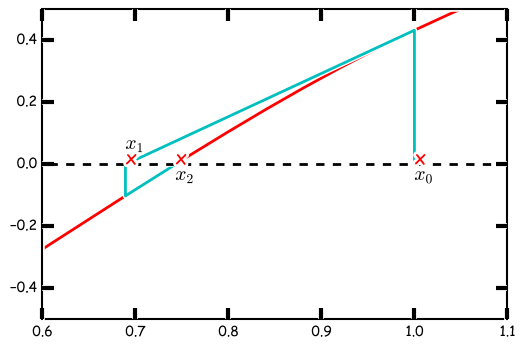

In [106]:
with plt.xkcd(False):
     from numpy import sin,cos 
     x=np.linspace(-2,2,101)
     plt.plot(x,cos(sin(x))) 
     plt.plot(x,sin(x)*sin(sin(x))-cos(x)**2*cos(sin(x)))
     x0=1
     plt.plot([1,1,x1,x1,x2,x2],[0,f(1),0,f(x1),0,f(x2)])
     plt.plot([-2,2],[0,0],'k--')
     plt.xlim([0.6,1.1]) 
     plt.ylim([-0.5,0.5])
     plt.text(1,0-0.05,"$x_0$")   
     plt.text(x1,0+0.05,"$x_1$") 
     plt.text(x2,0-0.05,"$x_2$") 
     plt.text(x0,0,"x",color="red") 
     plt.text(x1,0,"x",color="red")
     plt.text(x2,0,"x",color="red") 
     #plt.plot([x0,x0,x1],[0,ppfunc(x0)])  

In [74]:
fsolve(func,[-np.pi/2,3*np.pi/2])

array([ 1310.78680103,  -124.92104166])

In [75]:
fsolve(func,-1)

array([-0.74266448])

In [76]:
fsolve(func,1)

array([ 0.74266448])

**42**. Find out relative extema of $f(t)=t^2+1/t$ if any.

- $f'(t)=2t-1/t^2$ implies only one critical point, $t_0=1/2^{1/3}$;
- $f''(t)=2+2/t^3$ and $f''(t_0)>0$ implies $f(t)$ attains its relative minimum at $t_0$.

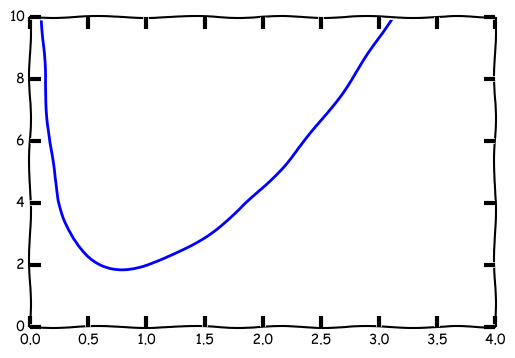

In [52]:
with plt.xkcd():
     from numpy import sin,cos 
     x=np.linspace(0.01,4,101)
     plt.plot(x,x**2+1/x) 
     #plt.plot(x,sin(x)*sin(sin(x))-cos(x)**2*cos(sin(x)))
     plt.ylim(0,10)

**44**. Find out relative extema of $f(x)=x\sqrt{4-x^2}$ if any.

- $f'(x)=\frac{4-2x^2}{\sqrt{4-x^2}}$ implies only one critical point, $x_0=\sqrt2$;
- $f''(x)=-\frac{x(12-2x^2)}{\sqrt{(4-x^2)^{3/2}}}$ and $f''(x_0)<0$ implies $f(x)$ attains its relative maximum at $x_0$ and is also its maximum.

In [61]:
from sympy import sqrt
x=Symbol("x")
f=x*sqrt(4-x*x)
pprint(diff(f,x,2))

   ⎛    2       ⎞ 
   ⎜   x        ⎟ 
-x⋅⎜──────── + 3⎟ 
   ⎜   2        ⎟ 
   ⎝- x  + 4    ⎠ 
──────────────────
     __________   
    ╱    2        
  ╲╱  - x  + 4    


/Users/cch/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


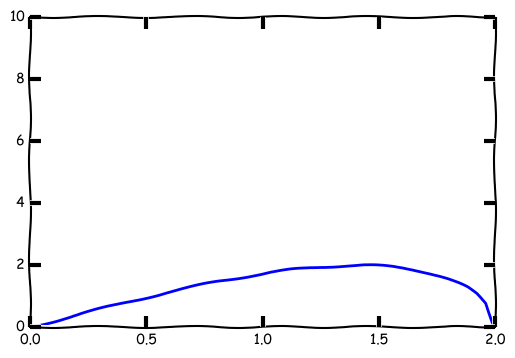

In [53]:
with plt.xkcd():
     from numpy import sin,cos ,sqrt
     x=np.linspace(0,4,101)
     plt.plot(x,x*sqrt(4-x**2)) 
     #plt.plot(x,sin(x)*sin(sin(x))-cos(x)**2*cos(sin(x)))
     plt.ylim(0,10)

**68.** $f(x)=x|x|$ has a inflation at $(0,0)$ but $f''(0)$ fails to exist.

- 

$$f'(x)\cases{2x&$x\le0$\\
               -2x&$x<0$}$$

-

$$f''_+(0)=\lim_{x\to0^+}\frac{f'(x)-f'(0)}{x}=2$$

- Similar to 2, $f_{-}''(0)=-2\ne f''_+(0)$; theirfor $f''(0)$ fails to exist.

**76.** Suppose that $f'(a)=f''(a)=0$ but $f'''(a)\ne0$. Then $f(x)$ has a inflation point at $(a,f(a))$.

With of loss generality, we assume $f'''(a)>0$. Since $f''(a)=0$$, we have:
 
 $$ f'''(a)=\lim_{h\to0}\frac{f''(a+h)-f''(a)}{h}=\lim_{h\to0}\frac{f''(a+h)}{h}>0$$
 
Then there exist a small $h_0>0$ such that 

$$\frac{f''(a+h)}{h}>0\text{ for any } |h|<h_0$$

**a).** if $0<h<h_0$, $f''(a+h)>0$;

**b).** if $-h_0<h<0$, $f''(a+h)<0$;

Thus the second derivative changes sign from negative to positive while $x$ moves from left to right of $x=a$. This proves that $f(x)$ has an inflation point at $(a,f(a))$.

Suppose $f(x)=\cos x-1+x^2/2-x^3/6$.
- $f'(0)=\left.-\sin x +x -x^2/2\right|_{x=0}=0$,
- $f''(0)=\left.-\cos x +1 -x\right|_{x=0}=0$,
- $f'''(0)=\left.\sin x  -1\right|_{x=0}=-1\ne0$,

Then $f(x)$ has an inflation at $(0,0)$

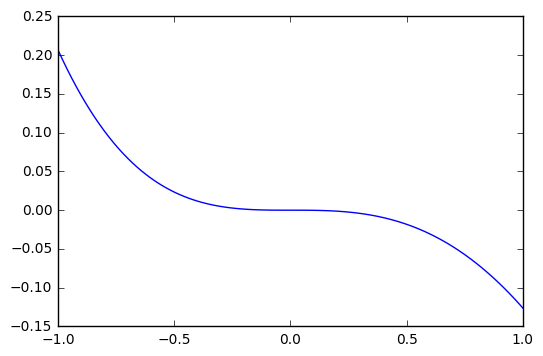

In [108]:
x=np.linspace(-1,1,101)
plt.plot(x, cos(x)-1+x**2/2-x**3/6)

Finding Absolute Extrema
===
Note
---
Procedure for finding Extrema: Suppose that $f (x)$ is continuous on $[a,b]$.

i). Find out all the critical values.
    
ii). Compute the values $f (a), (b)$ and the $f (c)$ where $c$ is the critical values.
    
iii). Absolute maximum of $f (x)$ is the largest in ii). and absolute minimum is the smallest in ii).



Example
---
$f (8) = 133$ is the maximum and $f (4) = - 75$ is the minimum for $f (x) =
  x^3 - 3 x^2 - 24 x + 5$ in $[- 3, 8]$.
  
**Analysis**

- find out critical values:

\begin{eqnarray*}
      0 & = & f' (x)\\
      & = & (x^3 - 3 x^2 - 24 x + 5)'\\
      & = & 3 x^2 - 6 x - 24\\
      & = & 3 (x - 4) (x + 2)\\
      \Longrightarrow &  & x = - 2 \text{ or } 4
\end{eqnarray*}

- evaluate the function valus at critical points, $x = - 3, - 2, 4, 8$:

\begin{eqnarray*}
      f (- 3) & = & 23\\
      f (- 2) & = & 33\\
      f (4) & = & - 75\\
      f (8) & = & 133
\end{eqnarray*}

- $f (8) = 133$ is the **absolute maximum** and $f (4) = - 75$ is the
    **absolute minimum** of $f (x)$ on $[- 3, 8]$.

Example
---
  $f (8) = 4$ is the maximum and $f (0) = 0$ is the minimum for $f (x) = x^{2/3}$ in $[- 1, 8]$.
  
**Analysis**

- find out critical values:

\begin{eqnarray*}
      0 \text{ or fails to exist} & = & f' (x)\\
      & = & \frac{2}{3 x^{1 / 3}}\\
      \Longrightarrow &  & x = 0
\end{eqnarray*}

- evaluate the function valus at critical points, $x = - 1, 0, 8$:

\begin{eqnarray*}
      f (- 1) & = & 1\\
      f (0) & = & 0\\
      f (8) & = & 4
\end{eqnarray*}

- $f (8) = 4$ is the absolute maximum and $f (0) = 0$ is the absolute
    minimum for $f (x)$ in $[- 1, 8]$

Note
---
Procedure for finding Extrema II: Suppose that $f (x)$ is continuous on $(a,b)$.

i.) Find out all the critical values.

ii). Compute the values $\lim\limits_{x \rightarrow a^+} f (x),
    \lim\limits_{x \rightarrow b^-} f (x)$, if exists, and $f (c)$ where
    $c$ is the critical values.

iii). Absolute maximum of $f (x)$ is the largest $f (c)$ in ii) if $f (c)
    \geqslant \lim\limits_{x \rightarrow a^+}  f (x) \text{ and } \lim\limits_{x \rightarrow b^-}  f (x)$

iv). Absolute minimum of $f (x)$ is the smallest $f (c)$ in ii) if $f (c)
    \leqslant \lim\limits_{x \rightarrow a^+}  f (x) \text{ and } \lim\limits_{x \rightarrow b^-}  f (x)$.


Example
---
  Finding the extrema for $f (x) = \frac{x}{1 - x^2}$ in $(- 1, 1)$ if any.
  
  Since it is possible for $f (x)$ to approach $\pm \infty$ ( for example as
  $x \rightarrow 1^{\pm}$), $f (x)$ has no extrema.
  
Analysis
---
- find out critical point if any: 

\begin{eqnarray*}
      0 & = & f' (x)\\
      & = & \frac{1 - x^2 + 2 x^2}{(1 - x^2)^2}\\
      & = & \frac{1 + x^2}{(1 - x^2)^2} > 0
    \end{eqnarray*}

- No critical point and $f' (x) > 0 \Longrightarrow f (x) \nearrow$.
- Since $\lim\limits_{x \rightarrow - 1^+}\frac{x}{1 - x^2} = -
    \infty$ and $\lim\limits_{x \rightarrow  1^-} \frac{x}{1 - x^2} =
    \infty$, no any extrema exist!


Eexercise
---
  Discuss the existence of extrema for a) $8 x^{1 / 3} - 2 x^{4 / 3}$ on $[-
  1, 8]$, b) $\sqrt{x} (1 - x)$ on $[0, 4]$.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import abs,sqrt,sign
%matplotlib inline 

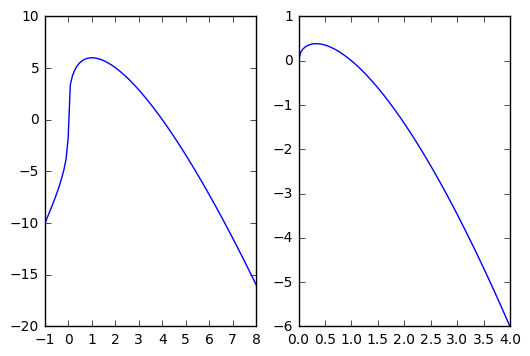

In [24]:
x1=np.linspace(-1,8,101)
x2=np.linspace(0,4,101)
plt.plot([1,2,2])
plt.subplot(121)
plt.plot(x1,8*sign(x1)*(abs(x1))**(1/3)-2*abs(x1)**(4/3))

plt.subplot(122)
plt.plot(x2,sqrt(x2)*(1-x2))


Analysis a).
---
<font color="white">
- find out critical points:
    \begin{eqnarray*}
      0 \text{ or fails to exist } & = & f' (x)\\
      & = & \frac{8 (1 - x)}{3 x^{\frac{2}{3}}}
    \end{eqnarray*}
    implies that $0$ and 1 are the critical points.
    
- $x = - 1, 0, 1, 8$
    \begin{eqnarray*}
      f (- 1) & = & - 10\\
      f (0) & = & 0\\
      f (1) & = & 6\\
      f (8) & = & - 16
    \end{eqnarray*}
- the maximum is 6 and the minimum is $- 16$.

  
    
Since $f (x)$ is continuous on closed interval $[- 1, 8]$ and $f (- 1) = -
    10, f (0) = 0, f (1) = 6, f (8) = - 16$, the maximum is 6 and the minimum
    is -16.
  </font>  

Analysis for b)
---
<font color="white">
- find out critical points:
\begin{eqnarray*}
      0 \text{ or fails to exist} & = & \left( \sqrt{x} (1 - x) \right)'\\
      & = & \frac{1 - 3 x}{2 \sqrt{x}}\\
      \Rightarrow &  & x = 0 \text{ and } \frac{1}{3}
    \end{eqnarray*}
- $x = 0, 1 / 3, 4$:
    \begin{eqnarray*}
      f (0) & = & 0\\
      f (1 / 3) & = & \frac{2}{3 \sqrt{3}}\\
      f (4) & = & - 6
    \end{eqnarray*}
- The critical value is 1/3 and the boundary points are 0 and 4. Since $f
    (0) = 0, f (1 / 3) = \frac{2}{3 \sqrt{3}}$ and $f (4) = - 6$, maximum is
    $\frac{2}{3 \sqrt{3}}$ and minimum is -6.
</font>  




Curve Sketching
===
Steps for Curve Sketching
1. Evaluate $f'(x)$,
  - critical points, 
  - decide monotonicity
- Evaluate $f''(x)$
  - decide concavity
- decide the shapes for curves in each sub-intervals classified from 1. and 2. and connent all the curves.
- also find out asymptotes if necessary:
  - horizontal asymptote, $y=c$ if $\lim\limits_{x\to\pm\infty}f(x)=c$,
  - vertical asymptote, $x=c$ if $\lim\limits_{x\to c^{\pm}}f(x)=\pm\infty$,
  - slant asymptote, $y=ax+b$ if $\lim\limits_{x\to \pm\infty}(f(x)-ax)=b$.

Example
---
$f(x)=2x^3-3x^2-12x+12$
- $f'(x)=6(x^2-x+2)$, critical points, $-1,2$,
  - $f$ increasing, $x\in(-\infty,-1]\cup[2,\infty)$,
  - $f$ decreasing, $x\in[-1,2]$,
- $f''(x)=6(2x-1)$, $f''(x)=0\to x=1/2$.
  - $f$ concave upward if $x\in[1/2,\infty)$,
  - $f$ concave downward if $x\in(-\infty,1/2]$,

In [110]:
x=Symbol("x")
f= 2 *x**3-3*x**2-12*x+12

In [111]:
pprint(diff(f,x))

   2           
6⋅x  - 6⋅x - 12


In [112]:
pprint(diff(f,x,2))

6⋅(2⋅x - 1)


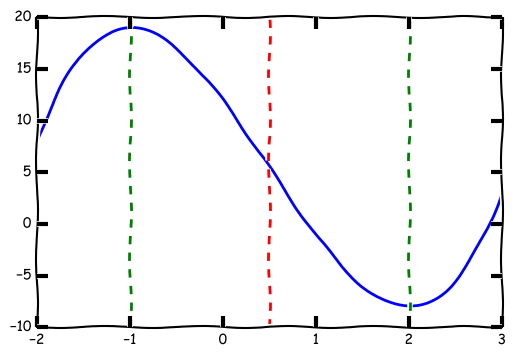

In [119]:
with plt.xkcd():
   x = np.linspace(-2,3,101)
   f = 2 *x**3-3*x**2-12*x+12
   plt.plot(x,f)
   plt.plot([-1,-1],[-10,20],'g--')
   plt.plot([2,2],[-10,20],'g--') 
   plt.plot([1/2,1/2],[-10,20],'r--')

Example
---
$f(x)=\frac{x^2}{x^2-1}=1+\frac{1}{x^2-1}$
- $f'(x)=\frac{-2x}{(x^2-1)^2}$, critical point, $0$,
  - $f$ increasing, $x\le0$,
  - $f$ decreasing, $x\ge0$,
- $f''(x)=\frac{2(3x^2+1)}{(x^2-1)^3}$, $\text{sign}(f)=\text{sign}(x^2-1)$
  - $f$ concave upward if $|x|\ge1$,
  - $f$ concave downward if $|x|\le1$,
- Vertical asymptotes at $x=\pm1$.  

In [121]:
x=Symbol("x")
f = 1+1/(x**2-1)

In [122]:
pprint(diff(f,x))

  -2⋅x   
─────────
        2
⎛ 2    ⎞ 
⎝x  - 1⎠ 


In [123]:
pprint(diff(f,x,2))

  ⎛    2     ⎞
  ⎜ 4⋅x      ⎟
2⋅⎜────── - 1⎟
  ⎜ 2        ⎟
  ⎝x  - 1    ⎠
──────────────
          2   
  ⎛ 2    ⎞    
  ⎝x  - 1⎠    


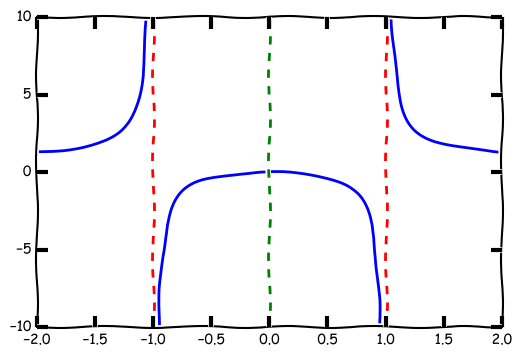

In [132]:
with plt.xkcd():
   e=1e-6 
   x1 = np.linspace(-2,-1-e,100)
   f1 = 1+1/(x1**2-1)
   plt.plot(x1,f1,'b-')
    
   x2 = np.linspace(-1+e,1-e,100)
   f2 = 1+1/(x2**2-1)
   plt.plot(x2,f2,'b-') 
   x3 = np.linspace(1+e,2,100)
   f3 = 1+1/(x3**2-1)
   plt.plot(x3,f3,'b-') 
   plt.plot([0,0],[-10,20],'g--')
   plt.plot([-1,-1],[-10,20],'r--') 
   plt.plot([1,1],[-10,20],'r--')
   plt.ylim(-10,10) 

Example
---
$f(x)=\frac{1}{1+\sin x}$, periodic with period $2\pi$, consider the part for $x\in(-\pi/2,3\pi/2)$,
- $f'(x)=\frac{-\cos x}{(\sin x^2+1)^2}$, critical point, $\pi/2$,
  - $f$ increasing, $\pi/2\le x <3\pi/2$,
  - $f$ decreasing, $-\pi/2<x\le\pi/2$,
- $f''(x)=\frac{2+\sin x-\sin x^2}{(1+\sin x)^3}=\frac{2-\sin x}{(1+\sin x)^2}>0$, always concave upward
- Vertical Asymptotes at $x=-\pi/2, 3\pi/2$.

In [134]:
x=Symbol("x")
from sympy import sin
f = 1+1/(1+sin(x))

In [135]:
pprint(diff(f,x))

   -cos(x)   
─────────────
            2
(sin(x) + 1) 


In [136]:
pprint(diff(f,x,2))

              2    
         2⋅cos (x) 
sin(x) + ──────────
         sin(x) + 1
───────────────────
               2   
   (sin(x) + 1)    


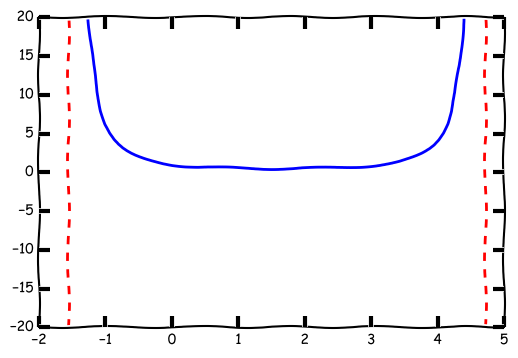

In [142]:
with plt.xkcd():
   e=1e-6 
   from numpy import sin,pi
   x = np.linspace(-pi/2+e,3*pi/2-e,100)
   f = 1/(1+sin(x))
   plt.plot(x,f,'b-')
    
   #plt.plot([0,0],[-10,20],'g--')
   plt.plot([-pi/2,-pi/2],[-20,20],'r--') 
   plt.plot([3*pi/2,3*pi/2],[-20,20],'r--')
   plt.ylim(-20,20) 

3-6, Exercises p.317
---


**#10.** $ f(t)=3t^4+4t^3$
- $f'(t)=12t^2(t+1)$, critical points, $-1,0$, sign$(f)$=sign$(t+1)$,
  - $f$ increasing for $t>-1$,
  - $f$ decreasing for $t<-1$
- $f''(t)=12t(3t+2)$, concave upward for $t\in(-\infty,-2/3]\cup[0,\infty)$, concave downward for $[-2/3,0]$.

In [159]:
t=Symbol("t")

f = 3*t**4+4*t**3

In [161]:
pprint(diff(f,t))

    3       2
12⋅t  + 12⋅t 


In [162]:
pprint(diff(f,t,2))

12⋅t⋅(3⋅t + 2)


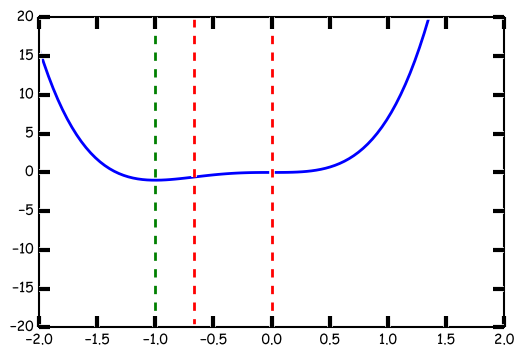

In [168]:
with plt.xkcd(False):
   t = np.linspace(-2,2,100)
   f = 3*t**4+4*t**3
   plt.plot(t,f,'b-')
    
   #plt.plot([0,0],[-20,20],'g-')
   plt.plot([-1,-1],[-20,20],'g--')
   plt.plot([0,0],[-20,20],'r--') 
   plt.plot([-2/3,-2/3],[-20,20],'r--')
   plt.ylim(-20,20) 

**#22.** $ f(x)=\frac{x^2-9}{x^2-4}=1-\frac{5}{x^2-4}$
- $f'(x)=\frac{-10x}{(x^2-4)^2}$, critical point, $0$,
  - $f$ increasing, $x\le0$,
  - $f$ decreasing, $x\ge0$,
- $f''(x)=\frac{-10(4x^2+3)}{(x^2-4)^3}$, $\text{sign}(f)=\text{sign}(4-x^2)$
  - $f$ concave upward if $|x|\le2$,
  - $f$ concave downward if $|x|\ge2$,
- Vertical asymptotes at $x=\pm2$.  

In [169]:
x=Symbol("x")

f = 1-5/(x**2-4)

In [170]:
pprint(diff(f,x))

   10⋅x  
─────────
        2
⎛ 2    ⎞ 
⎝x  - 4⎠ 


In [171]:
pprint(diff(f,x,2))

   ⎛      2     ⎞
   ⎜   4⋅x      ⎟
10⋅⎜- ────── + 1⎟
   ⎜   2        ⎟
   ⎝  x  - 4    ⎠
─────────────────
            2    
    ⎛ 2    ⎞     
    ⎝x  - 4⎠     


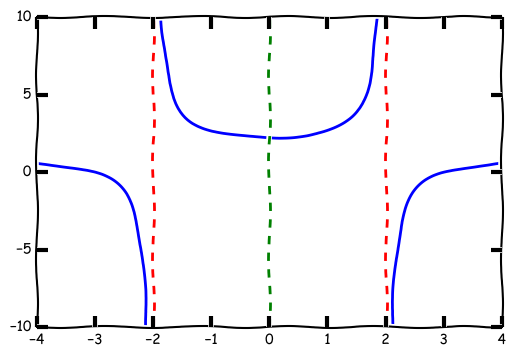

In [172]:
with plt.xkcd():
   e=1e-6 
   x1 = np.linspace(-4,-2-e,100)
   f1 = 1-5/(x1**2-4)
   plt.plot(x1,f1,'b-')
    
   x2 = np.linspace(-2+e,2-e,100)
   f2 = 1-5/(x2**2-4)
   plt.plot(x2,f2,'b-') 
   x3 = np.linspace(2+e,4,100)
   f3 = 1-5/(x3**2-4)
   plt.plot(x3,f3,'b-') 
   plt.plot([0,0],[-10,20],'g--')
   plt.plot([-2,-2],[-10,20],'r--') 
   plt.plot([2,2],[-10,20],'r--')
   plt.ylim(-10,10) 

**#34** $f(x)=\frac{x^2-2x+2}{x-1}=x-1+\frac{1}{x-1}$, 

$y=x-1$ is the slant asymptote since
$$\lim\limits_{x\to\pm\infty}(f-(x-1))=0$$

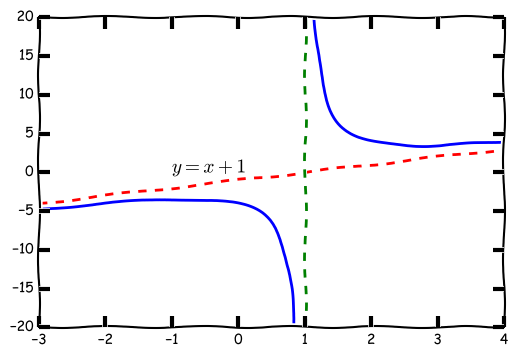

In [182]:
with plt.xkcd():
   e=1e-6 
   x1 = np.linspace(-3,1-e,100)
   f1 = x1-1+3/(x1-1)
   plt.plot(x1,f1,'b-')
    
   x2 = np.linspace(1+e,4,100)
   f2 = x2-1+3/(x2-1)
   plt.plot(x2,f2,'b-') 
   x = np.linspace(-3,4,100)
   y = x-1
   plt.plot(x,y,'r--') 
   plt.text(-1,0,"$y=x+1$") 
   plt.plot([1,1],[-20,20],'g--') 
   plt.ylim(-20,20) 

**#55**. $f(x)=\frac{x^{2n}-1}{x^{2n}+1}$

- $|x|=1$, $\lim\limits_{n\to\infty}f(x)=0$,
- $|x|<1$, $\lim\limits_{n\to\infty}f(x)=-1$,
- $|x|>1$, $\lim\limits_{n\to\infty}f(x)=1$


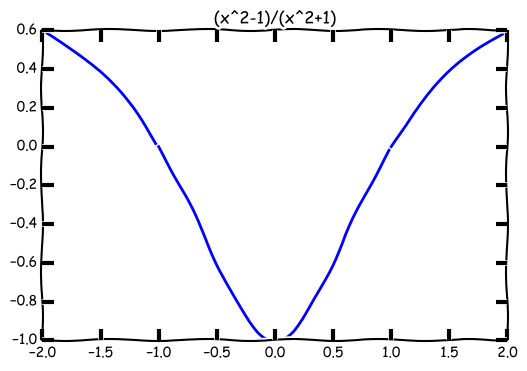

In [154]:
with plt.xkcd():
   n=1
   e=1e-6 
   x1 = np.linspace(-2,-1-e,100)
   f1 = (x1**(2*n)-1)/(x1**(2*n)+1)
   plt.plot(x1,f1,'b-')
    
   x2 = np.linspace(-1+e,1-e,100)
   f2 = (x2**(2*n)-1)/(x2**(2*n)+1)
   plt.plot(x2,f2,'b-') 
   x3 = np.linspace(1+e,2,100)
   f3 = (x3**(2*n)-1)/(x3**(2*n)+1)
   plt.plot(x3,f3,'b-') 
   #plt.plot([0,0],[-10,20],'g--')
   #plt.plot([-1,-1],[-10,20],'r--') 
   #plt.plot([1,1],[-10,20],'r--')
   #plt.ylim(-10,10) 
   plt.title("(x^2-1)/(x^2+1)") 

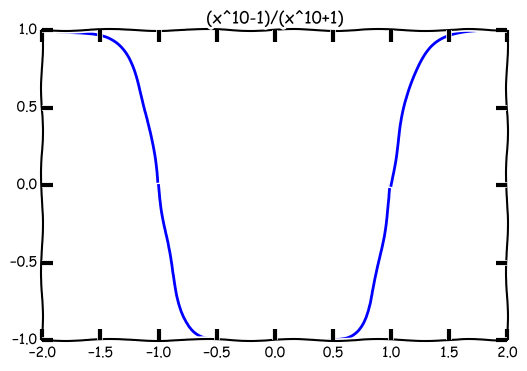

In [155]:
with plt.xkcd():
   n=5
   e=1e-6 
   x1 = np.linspace(-2,-1-e,100)
   f1 = (x1**(2*n)-1)/(x1**(2*n)+1)
   plt.plot(x1,f1,'b-')
    
   x2 = np.linspace(-1+e,1-e,100)
   f2 = (x2**(2*n)-1)/(x2**(2*n)+1)
   plt.plot(x2,f2,'b-') 
   x3 = np.linspace(1+e,2,100)
   f3 = (x3**(2*n)-1)/(x3**(2*n)+1)
   plt.plot(x3,f3,'b-') 
   #plt.plot([0,0],[-10,20],'g--')
   #plt.plot([-1,-1],[-10,20],'r--') 
   #plt.plot([1,1],[-10,20],'r--')
   #plt.ylim(-10,10) 
   plt.title("(x^10-1)/(x^10+1)") 

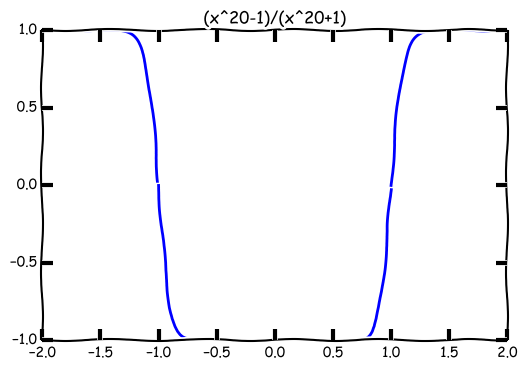

In [156]:
with plt.xkcd():
   n=10
   e=1e-6 
   x1 = np.linspace(-2,-1-e,100)
   f1 = (x1**(2*n)-1)/(x1**(2*n)+1)
   plt.plot(x1,f1,'b-')
    
   x2 = np.linspace(-1+e,1-e,100)
   f2 = (x2**(2*n)-1)/(x2**(2*n)+1)
   plt.plot(x2,f2,'b-') 
   x3 = np.linspace(1+e,2,100)
   f3 = (x3**(2*n)-1)/(x3**(2*n)+1)
   plt.plot(x3,f3,'b-') 
   #plt.plot([0,0],[-10,20],'g--')
   #plt.plot([-1,-1],[-10,20],'r--') 
   #plt.plot([1,1],[-10,20],'r--')
   #plt.ylim(-10,10) 
   plt.title("(x^20-1)/(x^20+1)") 

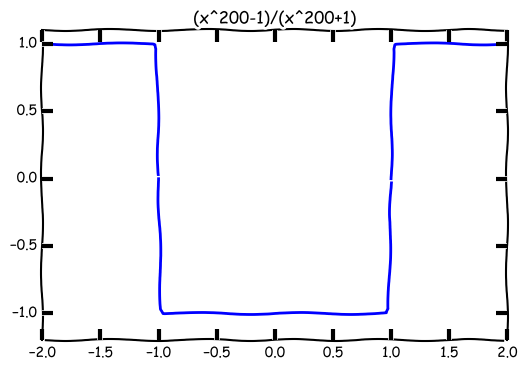

In [157]:
with plt.xkcd():
   n=100
   e=1e-6 
   x1 = np.linspace(-2,-1-e,100)
   f1 = (x1**(2*n)-1)/(x1**(2*n)+1)
   plt.plot(x1,f1,'b-')
    
   x2 = np.linspace(-1+e,1-e,100)
   f2 = (x2**(2*n)-1)/(x2**(2*n)+1)
   plt.plot(x2,f2,'b-') 
   x3 = np.linspace(1+e,2,100)
   f3 = (x3**(2*n)-1)/(x3**(2*n)+1)
   plt.plot(x3,f3,'b-') 
   #plt.plot([0,0],[-10,20],'g--')
   #plt.plot([-1,-1],[-10,20],'r--') 
   #plt.plot([1,1],[-10,20],'r--')
   plt.ylim(-1.2,1.1) 
   plt.title("(x^200-1)/(x^200+1)") 

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


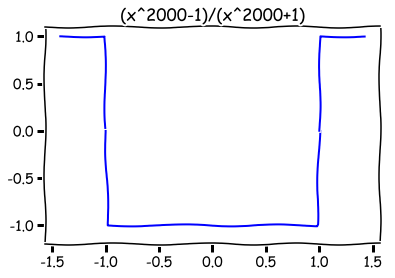

In [26]:
with plt.xkcd():
   n=1000
   e=1e-6 
   x1 = np.linspace(-2,-1-e,100)
   f1 = (x1**(2*n)-1)/(x1**(2*n)+1)
   plt.plot(x1,f1,'b-')
    
   x2 = np.linspace(-1+e,1-e,100)
   f2 = (x2**(2*n)-1)/(x2**(2*n)+1)
   plt.plot(x2,f2,'b-') 
   x3 = np.linspace(1+e,2,100)
   f3 = (x3**(2*n)-1)/(x3**(2*n)+1)
   plt.plot(x3,f3,'b-') 
   #plt.plot([0,0],[-10,20],'g--')
   #plt.plot([-1,-1],[-10,20],'r--') 
   #plt.plot([1,1],[-10,20],'r--')
   plt.ylim(-1.2,1.1) 
   plt.title("(x^2000-1)/(x^2000+1)") 

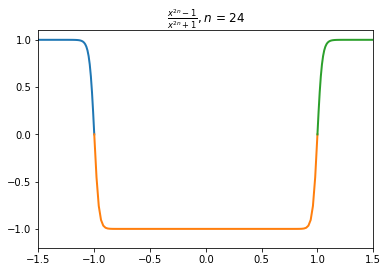

In [21]:
#from JSAnimation import IPython_display
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-1.5, 1.5), ylim=(-1.2, 1.1))
e=1e-6 
x1 = np.linspace(-2,-1-e,100)
x2 = np.linspace(-1+e,1-e,100)
x3 = np.linspace(1+e,2,100)
#f1 = (x1**(2*n)-1)/(x1**(2*n)+1)
def f(x,n):
    return (x**(2*n)-1)/(x**(2*n)+1)

line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
line3, = ax.plot([], [], lw=2)
x = np.linspace(0, 10, 1000)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    #return line1,line2,line3,

def animate(n):
    ax.set_title(r'$\frac{x^{2n}-1}{x^{2n}+1}, n$ = %d' %n)
    line1.set_data(x1, f(x1,n));
    line2.set_data(x2, f(x2,n));
    line3.set_data(x3, f(x3,n));
    return line1,line2,line3,

#six_x=animation.FuncAnimation(fig, animate, init_func=init,
six_x=animation.FuncAnimation(fig, animate, 25,#init_func=init,
                        interval=80, blit=True);
HTML(six_x.to_html5_video())

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

x = np.linspace(-2, 2, 200)

duration = 2

fig, ax = plt.subplots()
def make_frame(t):
    ax.clear()
    ax.plot(x, (x**(2*t)-1)/(x**(2*t)+1), lw=3)
    ax.set_ylim(-1.5, 1.5)
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
#animation.write_gif('matplotlib.gif', fps=20)

In [9]:
animation.ipython_display(fps=5)

t:  30%|███       | 3/10 [00:00<00:00, 25.86it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
